In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# https://drive.google.com/file/d/1qEGo4tGdatb5hWxvy4HhxXKv_mHdNLKf/view?usp=sharing
id = "1qEGo4tGdatb5hWxvy4HhxXKv_mHdNLKf"
download_url = f"http://drive.google.com/uc?export=download&id={id}"
df = pd.read_csv(download_url)
pd.set_option('display.max_columns', None)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Thông tin cá nhân(Demographics):
+ gender
+ SeniorCitizen
+ Partner
+ Dependents
+ tenure

Thông tin về các dịch vụ (Services):
+ PhoneService     
+ MultipleLines    
+ InternetService
+ OnlineSecurity  
+ OnlineBackup      
+ DeviceProtection
+ TechSupport
+ StreamingTV
+ StreamingMovies    

Thông tin liên quan đến Hợp đồng/Thanh toán:
+ Contract
+ PaperlessBilling
+ PaymentMethod
+ MonthlyCharges
+ TotalCharges

=> Mục tiêu cần phân tích : Churn

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


SƠ ĐỒ DỊCH VỤ VIỄN THÔNG DUNG ĐỂ PHÂN TÍCH

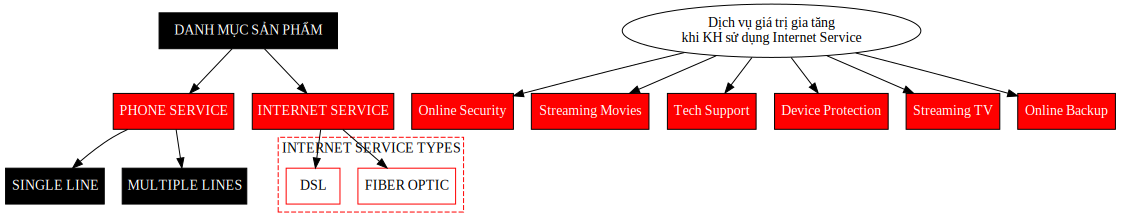

In [ ]:
from graphviz import Digraph

# Tạo đối tượng đồ thị có hướng
dot = Digraph(comment='Telcom Services', format='png')

# Các node chính
dot.node('A', 'DANH MỤC SẢN PHẨM', shape='box', style='filled', fillcolor='black', fontcolor='white')
dot.node('B', 'PHONE SERVICE', shape='box', style='filled', fillcolor='red', fontcolor='white')
dot.node('C', 'INTERNET SERVICE', shape='box', style='filled', fillcolor='red', fontcolor='white')

# Nhánh của Phone Service
dot.node('D', 'SINGLE LINE', shape='box', style='filled', fillcolor='black', fontcolor='white')
dot.node('E', 'MULTIPLE LINES', shape='box', style='filled', fillcolor='black', fontcolor='white')

# Nhánh của Internet Service
with dot.subgraph(name='cluster_internet') as c:
    c.attr(label='INTERNET SERVICE TYPES', color='red', style='dashed')
    c.node('F', 'FIBER OPTIC', shape='box', style='filled', fillcolor='white', color='red')
    c.node('G', 'DSL', shape='box', style='filled', fillcolor='white', color='red')

# Nhóm dịch vụ giá trị gia tăng
value_services = [
    ('H', 'Online Security'),
    ('I', 'Streaming Movies'),
    ('J', 'Tech Support'),
    ('K', 'Device Protection'),
    ('L', 'Streaming TV'),
    ('M', 'Online Backup')
]

for vid, label in value_services:
    dot.node(vid, label, shape='box', style='filled', fillcolor='red', fontcolor='white')

# Kết nối các node
dot.edges(['AB', 'AC'])
dot.edges(['BD', 'BE'])
dot.edges(['CF', 'CG'])
for vid, _ in value_services:
    dot.edge('Dịch vụ giá trị gia tăng \n khi KH sử dụng Internet Service', vid)

# Xuất hình
dot.render('telcom_services_diagram', view=True)
# Show hình
dot



# DATA PROCESSING


In [ ]:
#Kiểm tra null/NaN
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
#Kiểm tra Duplicate
df.duplicated().sum()

np.int64(0)

In [ ]:
#Kiểm tra dữ liệu trống/blank trong tập dữ liệu
df_check_blank = df.astype(str).apply(lambda x: x.str.strip().eq(''))
#1.ép kiểu str
#2.áp dụng hàm labda với x là các cột, ép kiểu cột str, strip xóa khoảng trắng đầu và cuối,
#eq[equal: bằng (==)] ý nghĩa chuỗi.eq('giá trị cần kiểm tra'), nếu giá trị nào bằng/có trong eq(..) thì trả về True

df_check_blank.any()


,0
customerID,False
gender,False
SeniorCitizen,False
Partner,False
Dependents,False
tenure,False
PhoneService,False
MultipleLines,False
InternetService,False
OnlineSecurity,False


In [ ]:
#CŨNG CÓ THỂ CHECK CÁC CỘT RỖNG TRONG DATA BẰNG CÁCH
(df==(' ')).sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df[(df == ' ').any(axis=1)]
#+ df.any(axis=0:Columns)	Kiểm tra dòng nào có ít nhất 1 True
#+ df.any(axis=1:Hàng)	Kiểm tra Hàng nào có ít nhất 1 True

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Dữ liệu cho thấy trong Cột TotalCharges có giá trị rỗng :

Khách hàng có TotalCharges rỗng
+ Đa số không dùng InternetService cáp quang FiberObtic, chỉ dùng mạng dây thông thường DSL
+ Số chi phí sử dụng dịch vụ theo tháng được khai báo tỷ lệ thuận với số dịch vụ đi kèm mà khách hàng đăng ký sử dụng
+ Tỷ lệ Churn là 0
+ Có tenure = 0 tương ứng với việc đây là các Khách hàng mới đăng ký dịch vụ và chưa hoặc mới bắt đầu dịch vụ

==> TotalCharge rỗng tức là chưa phát sinh phí giao dịch
- Giải thích: KH ký hợp đồng gói ?/ tháng (hệ thống ghi nhận Monthly Charges = ? nhưng chưa bị trừ tiền vì tháng đầu chưa bắt đầu tính phí -> TotalCharges chưa có)

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce').astype(float)
#errors= 'coerce' xử lý rỗng thành NaN, đồng thời chuyển dtype cột thành float

In [ ]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)

#Xử lý  các nhánh Dịch vụ

>Dịch vụ điện thoại PhoneService :
+ Dịch vụ đơn line SingleLine
+ Dịch vụ đa line MultipleLine

>Dịch vụ mạng InternetService :
+ Online Security
+ Streaming Movies
+ Tech Support
+ Device Protection
+ Streaming TV
+ Online Backup


#Xử lý nhánh PhoneService

In [ ]:
df['PhoneService'].value_counts()

,count
PhoneService,
Yes,6361
No,682


Khách hàng có dùng dịch vụ điện thoại thì sẽ chia ra 2 loại :

+ Điện thoại đa Line và đơn line

+ Khách hàng không dùng dịch vụ điện thoại thì sẽ là NoUse

In [ ]:
# Phoneservice_Singleline: PhoneService == "Yes" & MultipleLines == "No"
import numpy as np

df.insert(
    7,  # vị trí muốn chèn
    "Singleline", #new columns name
    np.where(
        (df["PhoneService"] == "Yes") & (df["MultipleLines"] == "No"),  #điều kiện
        "Yes",   # giá trị nếu đúng
        "No"     # giá trị nếu sai
    )
)

In [ ]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service','No')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Singleline,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,No,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,No,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,No,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
#GỘP VÀO 1 CỘT

# Tạo điều kiện
conditions = [
    df["PhoneService"] == "No",
    df["Singleline"] == "Yes",
    df["MultipleLines"] == "Yes"
]

# Giá trị tương ứng
choices = ["No", "Singleline", "MultipleLines"]

# Gộp vào cột PhoneService
df["PhoneService"] = np.select(conditions, choices, default="Unknown")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Singleline,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Singleline,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Singleline,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Singleline,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,MultipleLines,No,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,MultipleLines,No,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,MultipleLines,No,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
df.drop(columns=["Singleline", "MultipleLines"], inplace=True)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Singleline,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Singleline,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Singleline,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,MultipleLines,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,MultipleLines,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,MultipleLines,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


#PHÂN TÍCH MÔ TẢ(DESCRIPTIVE), PHÂN TÍCH CHUẨN ĐOÁN(DIANOSTIC)

DỰNG MÔ HÌNH MINDMAP:[LINK](https://mm.tt/map/3811749527?t=UyW5sbsdBJ)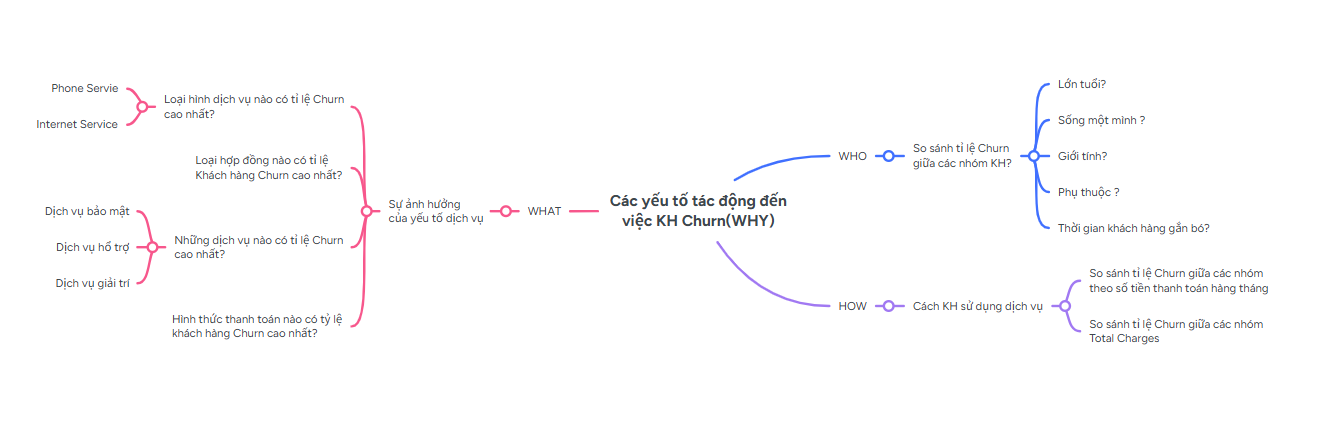

#DATA OVER VIEW

Số lượng Khách hàng theo dịch vụ

In [ ]:
total_cus = df['customerID'].nunique()

total_active = df[df['Churn'] == 'No']['customerID'].nunique()

total_churn = df[df['Churn'] == 'Yes']['customerID'].nunique()

print('Tổng số khách hàng: ',total_cus)
print('Tổng số khách hàng đang còn hoạt động:', total_active)
print('Tổng số khách hàng đã Churn:', total_churn)
#Lọc toàn bộ khách hàng có Churn = 'No', sau đó đếm số lượng customerID duy nhất trong nhóm này để tính ra tổng số khách hàng còn hoạt động.

Tổng số khách hàng:  7043
Tổng số khách hàng đang còn hoạt động: 5174
Tổng số khách hàng đã Churn: 1869


In [ ]:
churn_rate = round((total_churn/total_cus)*100,2)
print(f'Tỷ lệ Churn là: {churn_rate}%')

Tỷ lệ Churn là: 26.54%


In [ ]:
#PhoneService
phone_counts = df['PhoneService'].value_counts()

print(f"Số KH dùng Single line là: {phone_counts['Singleline']}")
print(f"Số KH dùng Multiple Lines là: {phone_counts['MultipleLines']}")
print(f"Số KH không dùng Phone Service là: {phone_counts['No']}")


Số KH dùng Single line là: 3390
Số KH dùng Multiple Lines là: 2971
Số KH không dùng Phone Service là: 682


In [ ]:
#InternetService
internet_counts = df['InternetService'].value_counts()

print(f'Số KH sử dụng Fiber optic(mạng cáp quang) là: {internet_counts['Fiber optic']}')
print(f'Số KH sử dụng DSL(mạng dây thông thường) là: {internet_counts['DSL']}')
print(f'Số KH không dùng dịch vụ Internet Service là: {internet_counts['No']}')

Số KH sử dụng Fiber optic(mạng cáp quang) là: 3096
Số KH sử dụng DSL(mạng dây thông thường) là: 2421
Số KH không dùng dịch vụ Internet Service là: 1526


# WHAT: Phân tích sự ảnh hưởng của các yếu tố dịch vụ đến tỷ lệ Churn

**Theo dịch vụ:**

/tmp/ipython-input-409122623.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded = df[cols].replace({'Yes': 1, 'No': 0, 'DSL': 1, 'Fiber optic': 1, 'No internet service': 0,  'Singleline' : 1, 'MultipleLines' : 1})


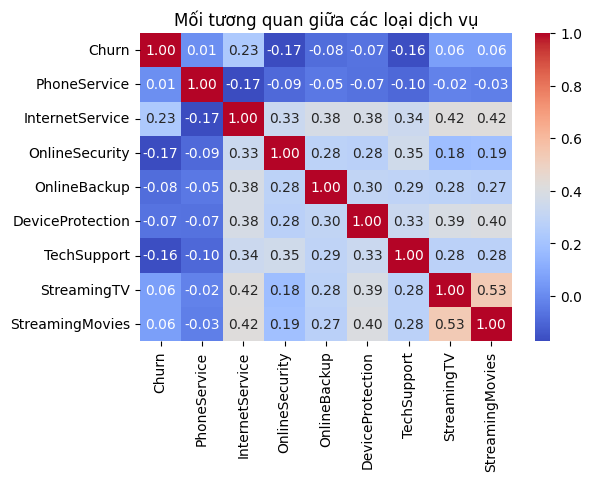

In [ ]:
cols = ['Churn', 'PhoneService', 'InternetService',
        'OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies',]

# Chuyển giá trị Yes/No (hoặc tương tự) sang số
df_encoded = df[cols].replace({'Yes': 1, 'No': 0, 'DSL': 1, 'Fiber optic': 1, 'No internet service': 0,  'Singleline' : 1, 'MultipleLines' : 1})

# Tính ma trận tương quan
services_corr = df_encoded.corr()

# Vẽ heatmap
plt.figure(figsize=(6,4))
sns.heatmap(services_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mối tương quan giữa các loại dịch vụ")
plt.show()


In [ ]:
services = ['PhoneService', 'InternetService',
            'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport',
            'StreamingTV', 'StreamingMovies']

for col in services:

    # Tính tỷ lệ churn theo dịch vụ
    service_rate = df.groupby(col)['Churn'].value_counts(normalize=True)
    print(f'{col} - Churn Rate (%):')
    print((service_rate * 100).round(2))


PhoneService - Churn Rate (%):
PhoneService   Churn
MultipleLines  No       71.39
               Yes      28.61
No             No       75.07
               Yes      24.93
Singleline     No       74.96
               Yes      25.04
Name: proportion, dtype: float64
InternetService - Churn Rate (%):
InternetService  Churn
DSL              No       81.04
                 Yes      18.96
Fiber optic      No       58.11
                 Yes      41.89
No               No       92.60
                 Yes       7.40
Name: proportion, dtype: float64
OnlineSecurity - Churn Rate (%):
OnlineSecurity       Churn
No                   No       58.23
                     Yes      41.77
No internet service  No       92.60
                     Yes       7.40
Yes                  No       85.39
                     Yes      14.61
Name: proportion, dtype: float64
OnlineBackup - Churn Rate (%):
OnlineBackup         Churn
No                   No       60.07
                     Yes      39.93
No internet se


Churn by PhoneService:
 PhoneService   Churn
MultipleLines  No       71.39
               Yes      28.61
No             No       75.07
               Yes      24.93
Singleline     No       74.96
               Yes      25.04
Name: proportion, dtype: float64


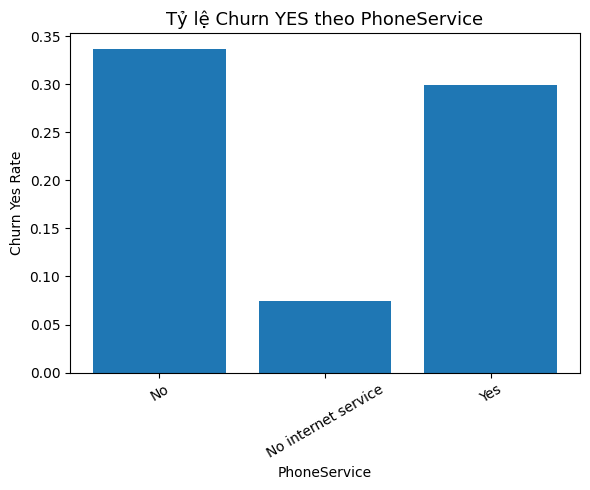


Churn by InternetService:
 InternetService  Churn
DSL              No       81.04
                 Yes      18.96
Fiber optic      No       58.11
                 Yes      41.89
No               No       92.60
                 Yes       7.40
Name: proportion, dtype: float64


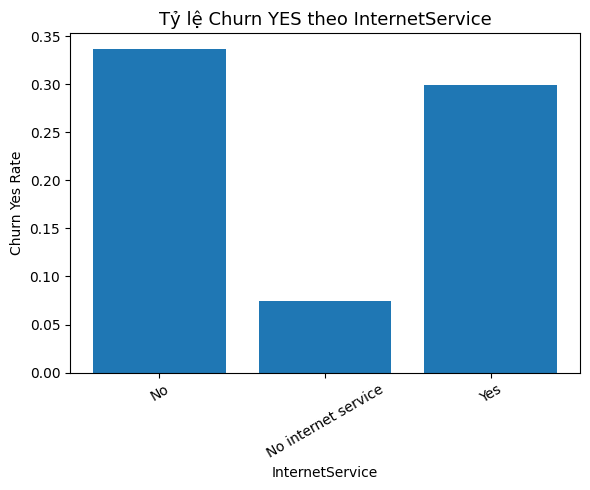


Churn by OnlineSecurity:
 OnlineSecurity       Churn
No                   No       58.23
                     Yes      41.77
No internet service  No       92.60
                     Yes       7.40
Yes                  No       85.39
                     Yes      14.61
Name: proportion, dtype: float64


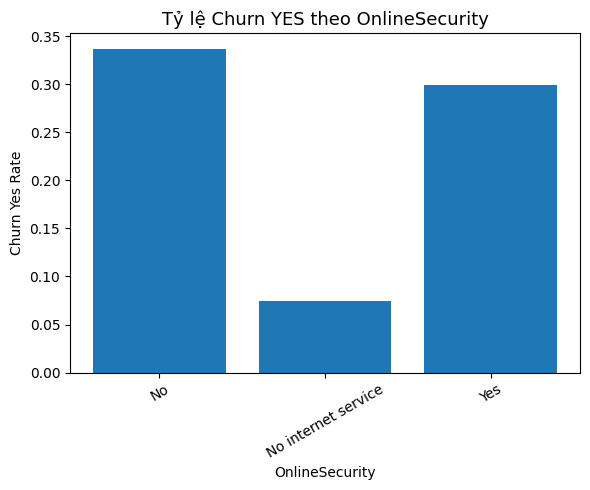


Churn by OnlineBackup:
 OnlineBackup         Churn
No                   No       60.07
                     Yes      39.93
No internet service  No       92.60
                     Yes       7.40
Yes                  No       78.47
                     Yes      21.53
Name: proportion, dtype: float64


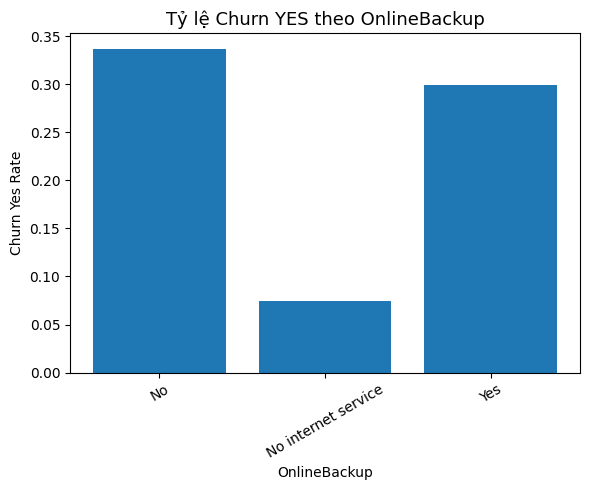


Churn by DeviceProtection:
 DeviceProtection     Churn
No                   No       60.87
                     Yes      39.13
No internet service  No       92.60
                     Yes       7.40
Yes                  No       77.50
                     Yes      22.50
Name: proportion, dtype: float64


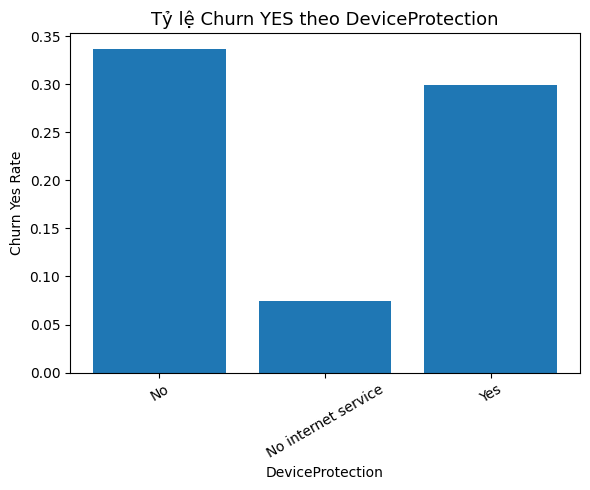


Churn by TechSupport:
 TechSupport          Churn
No                   No       58.36
                     Yes      41.64
No internet service  No       92.60
                     Yes       7.40
Yes                  No       84.83
                     Yes      15.17
Name: proportion, dtype: float64


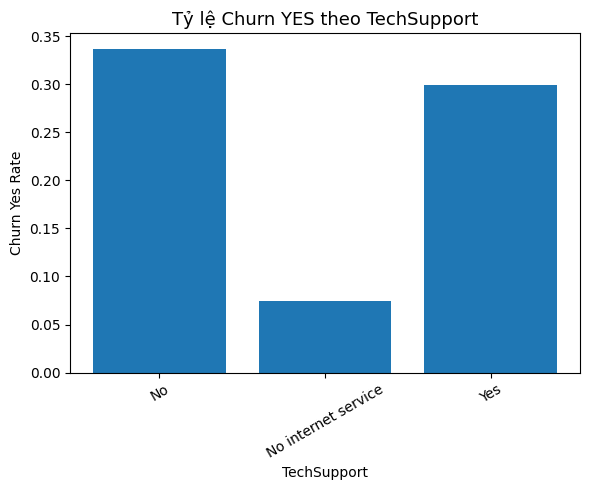


Churn by StreamingTV:
 StreamingTV          Churn
No                   No       66.48
                     Yes      33.52
No internet service  No       92.60
                     Yes       7.40
Yes                  No       69.93
                     Yes      30.07
Name: proportion, dtype: float64


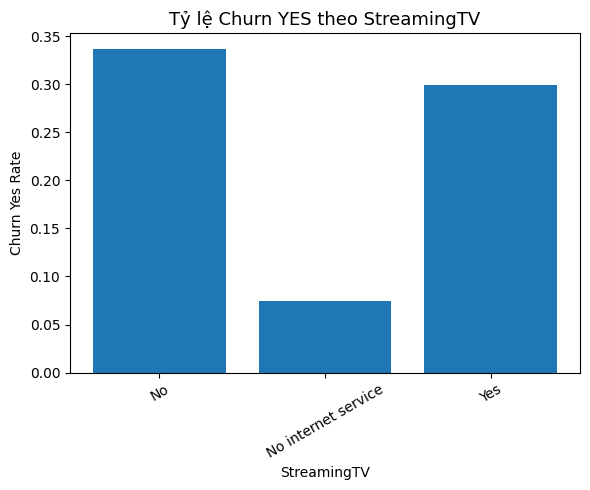


Churn by StreamingMovies:
 StreamingMovies      Churn
No                   No       66.32
                     Yes      33.68
No internet service  No       92.60
                     Yes       7.40
Yes                  No       70.06
                     Yes      29.94
Name: proportion, dtype: float64


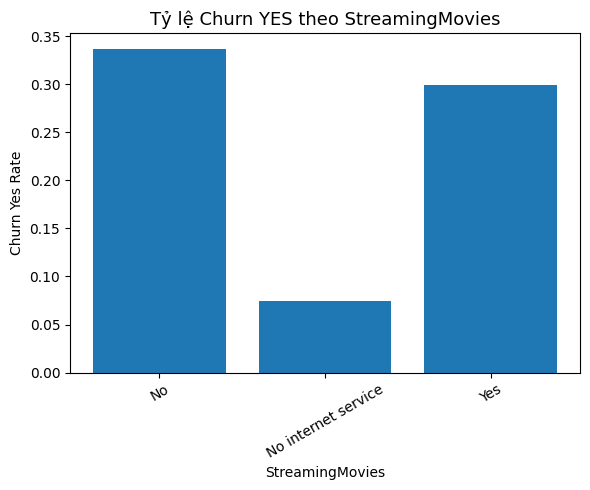

In [ ]:
for col in ['PhoneService', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
    pct = df.groupby(col)['Churn'].value_counts(normalize=True)
    print(f"\nChurn by {col}:\n", (pct * 100).round(2))
    # Lọc chỉ churn = Yes
    service_churn_yes = service_rate.xs('Yes', level='Churn')

    # Vẽ bar chart
    plt.figure(figsize=(6, 5))
    plt.bar(service_churn_yes.index, service_churn_yes.values)

    plt.title(f'Tỷ lệ Churn YES theo {col}', fontsize=13)
    plt.xlabel(col)
    plt.ylabel('Churn Yes Rate')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

**PhoneService:**
- PhoneService: Tỷ lệ churn gần giống nhau (25-28%) giữa có và không có dịch vụ điện thoại, cho thấy dịch vụ này ít ảnh hưởng đến Churn.
- MultipleLines: Khách hàng có nhiều đường dây (Yes: 28.6%) churn hơi cao hơn so với Đơn line hoặc không dùng điện thoại (25%), nhưng tác động không lớn.

**InternetService:**
- Fiber optic có tỷ lệ churn cao nhất (41.9%), gấp đôi DSL (18.9%) và gấp 5 lần không dùng Internet (7.4%). Điều này cho thấy Fiber optic, dù đắt tiền, có thể gây bất mãn (giá cao hoặc chất lượng không tương xứng).
- Không dùng Internet có tỷ lệ churn thấp nhất (7.4%), cho thấy nhóm này ổn định hơn.

**Dịch vụ bổ sung (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies):**
- Không có dịch vụ bổ sung (No): Tỷ lệ churn cao (33.5-41.7%), đặc biệt với OnlineSecurity (41.8%) và TechSupport (41.6%), cho thấy thiếu các dịch vụ này làm tăng nguy cơ churn.
- Có dịch vụ bổ sung (Yes): Tỷ lệ churn thấp hơn rõ rệt (14.6-30%), đặc biệt với OnlineSecurity (14.6%) và TechSupport (15.2%), cho thấy các dịch vụ này tăng sự hài lòng.
- No internet service: Tỷ lệ churn rất thấp (7.4%), tương tự nhóm không dùng Internet.
- StreamingTV và StreamingMovies có tỷ lệ churn cao hơn (30%) so với các dịch vụ bảo vệ/hỗ trợ, có thể do chi phí cao hoặc nhu cầu không thiết yếu.

**Nhận xét:**
- Fiber optic là yếu tố chính làm tăng tỷ lệ Churn, đặc biệt khi Khách hàng thiếu các dịch vụ bổ sung như OnlineSecurity hoặc TechSupport.
- Các dịch vụ bổ sung: đặc biệt bảo mật OnlineSecurity và hỗ trợ TechSupport, giúp giảm Churn đáng kể, cho thấy vai trò của hỗ trợ kỹ thuật và bảo mật.
- Nhóm không dùng Internet ổn định nhất, nhưng ít khách hàng (do tỷ lệ thấp trong No internet service).
- Tập trung cải thiện chất lượng Fiber optic, khuyến khích sử dụng OnlineSecurity và TechSupport để giữ chân khách hàng.

**Theo Hợp đồng:**

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


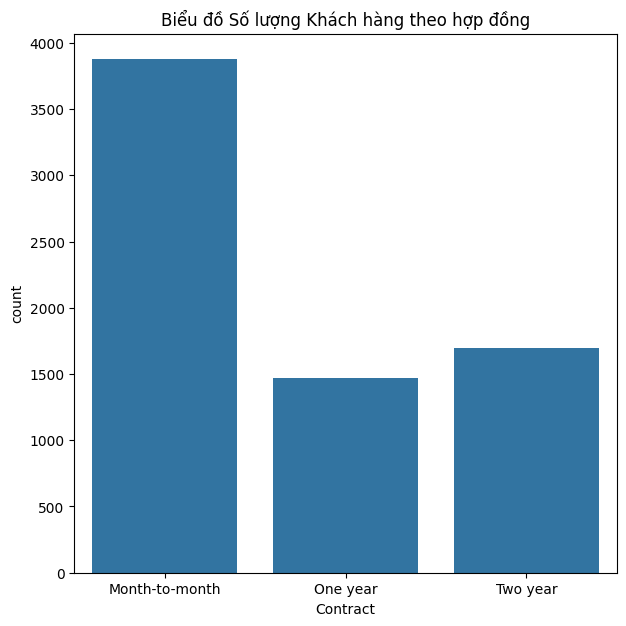

In [ ]:
contract_counts = df['Contract'].value_counts()
print(contract_counts)

plt.figure(figsize=(7,7))
sns.countplot(
    data=df,
    x='Contract',
    # order=['Month-to-month', 'Two year', 'One year']
)
plt.title('Biểu đồ Số lượng Khách hàng theo hợp đồng')
plt.show()

Contract by Churn:  Contract        Churn
Month-to-month  No       57.29
                Yes      42.71
One year        No       88.73
                Yes      11.27
Two year        No       97.17
                Yes       2.83
Name: proportion, dtype: float64


/tmp/ipython-input-1273296072.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contract_churn_yes.index, y=contract_churn_yes.values, palette='Reds_r')


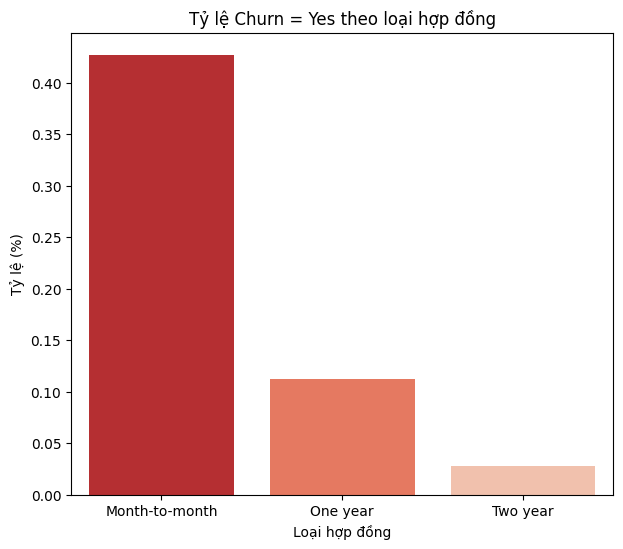

In [ ]:
# Tính tỷ lệ Churn theo Contract
contract_rate = df.groupby('Contract')['Churn'].value_counts(normalize=True)
print('Contract by Churn: ',(contract_rate*100).round(2))
# Lọc chỉ lấy Churn = 'Yes'
contract_churn_yes = contract_rate[:, 'Yes']

# Vẽ biểu đồ
plt.figure(figsize=(7,6))
sns.barplot(x=contract_churn_yes.index, y=contract_churn_yes.values, palette='Reds_r')
plt.title('Tỷ lệ Churn = Yes theo loại hợp đồng')
plt.xlabel('Loại hợp đồng')
plt.ylabel('Tỷ lệ (%)')
plt.show()


Chủ yếu là Khách hàng ký hợp đồng ngắn hạn Month-to-Month với ~3.9K gấp hơn 2 lần so với 2 hình thức còn lại


⇒ Hợp đồng càng ngắn hạn thì Khách Hàng sẽ dễ dàng rời bỏ hơn (churn rate: 42.71%)


**Theo Hình thứ thanh toán(Paymen Method):**

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


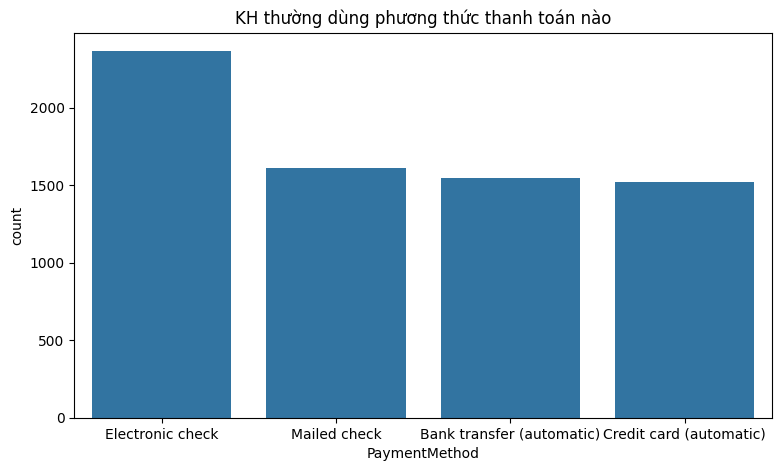

In [ ]:
payment_counts = df['PaymentMethod'].value_counts()
print(payment_counts)


plt.figure(figsize=(9,5))
sns.countplot(data=df, x='PaymentMethod')
plt.title('KH thường dùng phương thức thanh toán nào')
plt.show()


PaymentMethod              Churn
Bank transfer (automatic)  No       83.29
                           Yes      16.71
Credit card (automatic)    No       84.76
                           Yes      15.24
Electronic check           No       54.71
                           Yes      45.29
Mailed check               No       80.89
                           Yes      19.11
Name: proportion, dtype: float64


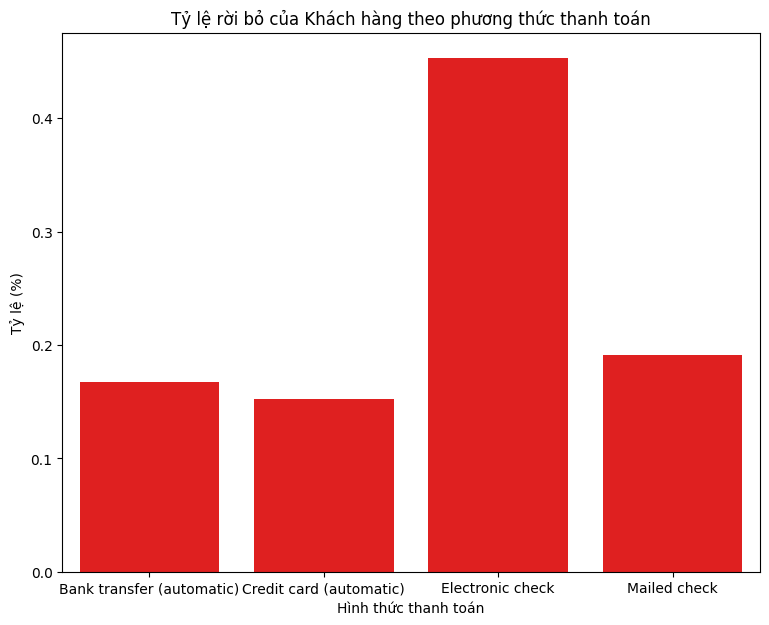

In [ ]:
#Biểu đồ tỷ lệ Churn theo phương thức thanh toán
payment_churn_rate = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True)
print((payment_churn_rate*100).round(2))
#Lọc churn Yes
payment_churn_yes = payment_churn_rate[:,'Yes']

plt.figure(figsize=(9,7))
sns.barplot(x=payment_churn_yes.index, y=payment_churn_yes.values, color='red')
plt.title('Tỷ lệ rời bỏ của Khách hàng theo phương thức thanh toán', fontsize=12)
plt.xlabel('Hình thức thanh toán')
plt.ylabel('Tỷ lệ (%)')
plt.show()

Hình thức thanh toán phổ biến: Electronic check (Séc điện tử)

⇒ Đồng thời là hình thức thanh toán có tỷ lệ rời bỏ cao nhất (45%) cao hơn x2, x3 so với các phương thức còn lại



#WHO: Phân tích tỷ lệ Churn của các nhóm Khách hàng dựa theo tính chất nhân khẩu học

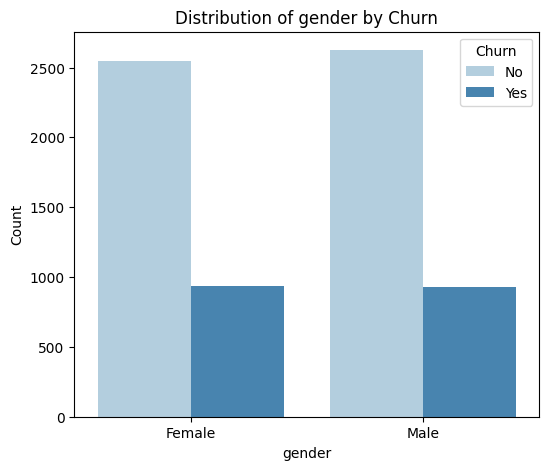

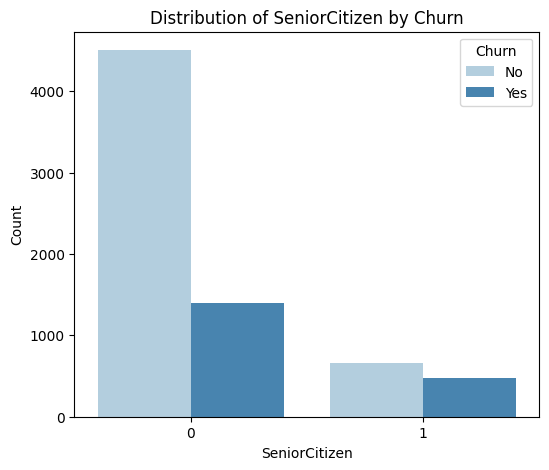

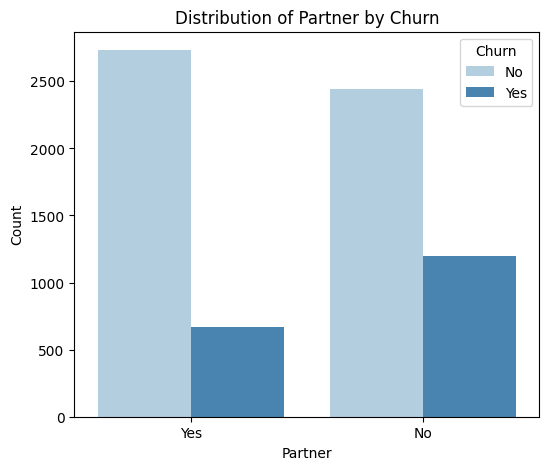

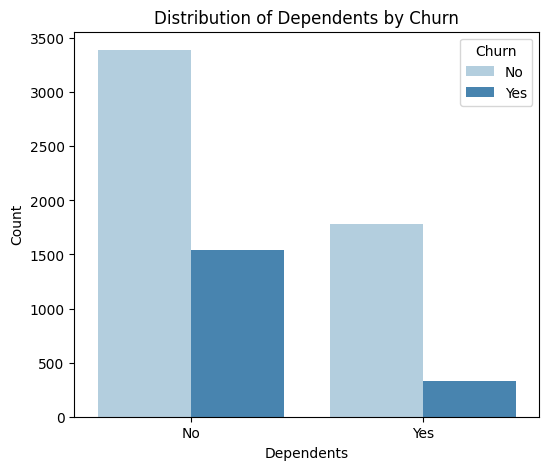

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cols_who = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

for col in cols_who:
    plt.figure(figsize=(6, 5))
    sns.countplot(x=col, hue='Churn', data=df, palette='Blues', legend=True)

    # # Hiển thị giá trị trên từng cột
    # for p in ax.patches:
    #     height = p.get_height()
    #     ax.text(
    #         p.get_x() + p.get_width() / 2,  # vị trí ngang giữa cột
    #         height + 0.5,                   # cao hơn đầu cột một chút
    #         f'{int(height)}',               # hiển thị giá trị (đổi sang int)
    #         ha='center', va='bottom', fontsize=10
    #     )

    plt.title(f'Distribution of {col} by Churn')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


In [ ]:
cols_who = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

for i in cols_who:

    # Tính tỷ lệ churn Yes/No
    pctw = df.groupby(i)['Churn'].value_counts(normalize=True)

    # Lọc chỉ churn = Yes
    who_churn_yes = pctw.loc[:,'Yes']

    print(f"\nChurn by {i} (YES only):\n", (who_churn_yes * 100).round(2))



Churn by gender (YES only):
 gender
Female    26.92
Male      26.16
Name: proportion, dtype: float64

Churn by SeniorCitizen (YES only):
 SeniorCitizen
0    23.61
1    41.68
Name: proportion, dtype: float64

Churn by Partner (YES only):
 Partner
No     32.96
Yes    19.66
Name: proportion, dtype: float64

Churn by Dependents (YES only):
 Dependents
No     31.28
Yes    15.45
Name: proportion, dtype: float64


**Tenure**

/tmp/ipython-input-3317598106.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


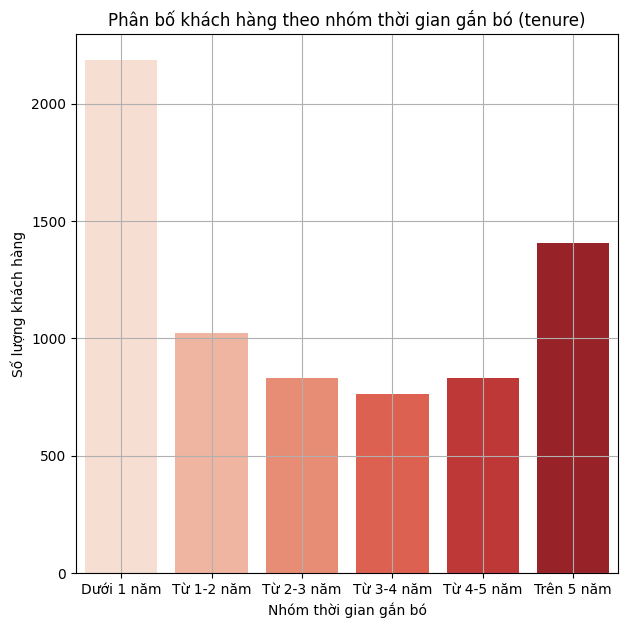

In [ ]:
def tenure_group(tenure):
  if tenure <= 12 :
    return 'Dưới 1 năm'
  if tenure <= 24 :
    return 'Từ 1-2 năm'
  if tenure <= 36 :
    return 'Từ 2-3 năm'
  if tenure <= 48 :
    return 'Từ 3-4 năm'
  if tenure <= 60 :
    return 'Từ 4-5 năm'
  else:
    return 'Trên 5 năm'

df['tenure_group'] = df['tenure'].apply(tenure_group)
df['tenure_group']

# Vẽ biểu đồ countplot
plt.figure(figsize=(7,7))
sns.countplot(
    data=df,
    x='tenure_group',
    order=['Dưới 1 năm', 'Từ 1-2 năm', 'Từ 2-3 năm', 'Từ 3-4 năm', 'Từ 4-5 năm', 'Trên 5 năm'],
    palette='Reds',
)
plt.title('Phân bố khách hàng theo nhóm thời gian gắn bó (tenure)')
plt.xlabel('Nhóm thời gian gắn bó')
plt.ylabel('Số lượng khách hàng')
plt.grid(True)
plt.show()


In [ ]:
tenure_counts = df['tenure_group'].value_counts()

print('Số lượng khách hàng theo thời gian sử dụng dịch vụ:')
print(f'- Dưới 1 năm : {tenure_counts['Dưới 1 năm']}')
print(f'- Từ 2-3 năm : {tenure_counts['Từ 2-3 năm']}')
print(f'- Từ 3-4 năm : {tenure_counts['Từ 3-4 năm']}')
print(f'- Từ 4-5 năm : {tenure_counts['Từ 4-5 năm']}')
print(f'- Trên 5 năm : {tenure_counts['Trên 5 năm']}')

Số lượng khách hàng theo thời gian sử dụng dịch vụ:
- Dưới 1 năm : 2186
- Từ 2-3 năm : 832
- Từ 3-4 năm : 762
- Từ 4-5 năm : 832
- Trên 5 năm : 1407


In [ ]:
pct_tenure = df.groupby('tenure_group')['Churn'].value_counts(normalize=True) #Normalize=False mặc định tính số lượng, Normalize=True tính tỷ lệ
print('Churn By Tenure Group: \n', (pct_tenure*100).round(2))

Churn By Tenure Group: 
 tenure_group  Churn
Dưới 1 năm    No       52.56
              Yes      47.44
Trên 5 năm    No       93.39
              Yes       6.61
Từ 1-2 năm    No       71.29
              Yes      28.71
Từ 2-3 năm    No       78.37
              Yes      21.63
Từ 3-4 năm    No       80.97
              Yes      19.03
Từ 4-5 năm    No       85.58
              Yes      14.42
Name: proportion, dtype: float64


**Nhân khẩu học (Demographics)**

**Gender:**

Female: Churn 26.92%, Male: Churn 26.16%

Tỷ lệ churn gần như giống nhau giữa nam và nữ, cho thấy giới tính ít ảnh hưởng đến churn.

**SeniorCitizen:**

Số lượng Khách hàng trẻ tuổi chiếm đa số , nhưng ít rời bỏ (churn rate: ~24%)

Nhóm Khách hàng cao tuổi có tỷ lệ rời bỏ cao (churn rate: ~42%), nhưng số lượng lại chiếm tỷ lệ chỉ ~16% trong tổng số Khách .

⇒ Cần hướng đến xây dựng tệp khách hàng trẻ vì họ sẽ có mức độ gắn bó tốt hơn

**Partner:**

Số lượng Khách hàng có và không có bạn đời không có sự chênh lệch đáng kể (~3600 và ~3400)

⇒ Nhưng, Khách hàng không có bạn đời sẽ có xu hướng rời bỏ cao (churn rate: 32.96%)

**Dependents:**

Số lượng khách hàng không có người phụ thuộc chiếm đa số (~70%) Đồng thời họ cũng có xu hướng rời bỏ cao

⇒ Việc khách hàng có người phụ thuộc có thể ảnh hưởng đáng kể đến tỉ lệ churn

**Tenure:**

Khách hàng mới, thời gian sử dụng dịch vụ dưới 1 năm có tổng số lượng cao nhất 2.2K. Đồng thời, là nhóm Khách hàng dễ rời bỏ nhất (churn rate: ~47%)

Khách hàng lâu năm (trên 5 năm) có số lượng cao thứ 2 là 1.4K đồng thời là nhóm KH có mức độ gắn bó cao hơn với dịch vụ (churn rate: ~7%)

⇒ Tỷ lệ churn rate giảm dần nếu số năm sử dụng dịch vụ của Khách hàng tăng lên

#HOW: Phân tích Tỷ lệ Churn Theo các mà Khách hàng sử dụng dịch vụ

In [ ]:
df[['MonthlyCharges', 'TotalCharges']].describe()

,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000
mean,64.761692,2279.734304
std,30.090047,2266.794470
min,18.250000,0.000000
25%,35.500000,398.550000
50%,70.350000,1394.550000
75%,89.850000,3786.600000
max,118.750000,8684.800000



**MonthlyCharges (Chi phí hàng tháng)**
- Mean (64.76) và Median (70.35): Trung bình thấp hơn trung vị, cho thấy phân phối hơi lệch trái, với một số khách hàng trả chi phí thấp kéo trung bình xuống.
- Std (30.09): Độ lệch chuẩn lớn, cho thấy sự khác biệt đáng kể giữa các gói dịch vụ (từ cơ bản đến cao cấp).
- Min (18.25) và Max (118.75): Phạm vi chi phí rộng, từ các gói rẻ (có thể chỉ có dịch vụ cơ bản như điện thoại) đến các gói đắt (kết hợp Internet, TV, v.v.).
- Phân vị:
  - 25% khách hàng trả ≤ 35.5 USD (gói cơ bản).
  - 50% khách hàng trả ≤ 70.35 USD.
  - 25% khách hàng trả ≥ 89.85 USD (gói cao cấp).
- Nhận xét: Sự khác biệt lớn trong MonthlyCharges có thể liên quan đến các dịch vụ như InternetService (Fiber optic đắt hơn DSL hoặc không dùng Internet). Khách hàng trả chi phí cao hơn có thể có nguy cơ Churn cao hơn nếu họ không hài lòng với dịch vụ.

**TotalCharges (Tổng chi phí)**
- Mean (2279.73) và Median (1394.55): Trung bình lớn hơn trung vị đáng kể, cho thấy phân phối lệch phải mạnh. Điều này hợp lý vì TotalCharges tăng theo tenure, và một số khách hàng lâu năm có tổng chi phí rất cao.
- Std (2266.79): Độ lệch chuẩn rất cao, phản ánh sự khác biệt lớn giữa khách hàng mới (tổng chi phí thấp) và khách hàng lâu năm (tổng chi phí cao).
- Min (0): khách hàng mới chưa phát sinh chi phí
- Max (8684.80): Tổng chi phí cao nhất phù hợp với khách hàng có tenure dài và MonthlyCharges cao.
- Phân vị:
  - 25% khách hàng có TotalCharges ≤ 398.55 USD (khách hàng mới hoặc gói rẻ).
  - 50% khách hàng có TotalCharges ≤ 1394.55 USD.
  - 25% khách hàng có TotalCharges ≥ 3786.60 USD (khách hàng trung thành, chi phí cao).
- Nhận xét: Phân phối lệch phải của TotalCharges cho thấy một số ít khách hàng có tổng chi phí rất cao, trong khi đa số có chi phí trung bình hoặc thấp.

**Monthly Charges:**

In [ ]:
def monthcharge_groups(MonthlyCharges):
    if MonthlyCharges <= 25:
        return 'Dưới 25 $'
    elif MonthlyCharges <= 50:
        return 'Từ 25-50 $'
    elif MonthlyCharges <= 75:
        return 'Từ 50-75 $'
    elif MonthlyCharges <= 90:
        return 'Từ 75-90 $'
    else:
        return 'Từ 90 $ trở lên'
df['monthcharge_group'] = df['MonthlyCharges'].apply(monthcharge_groups)
df['monthcharge_group'].value_counts().sort_index()


,count
monthcharge_group,
Dưới 25 $,1406
Từ 25-50 $,893
Từ 50-75 $,1624
Từ 75-90 $,1381
Từ 90 $ trở lên,1739


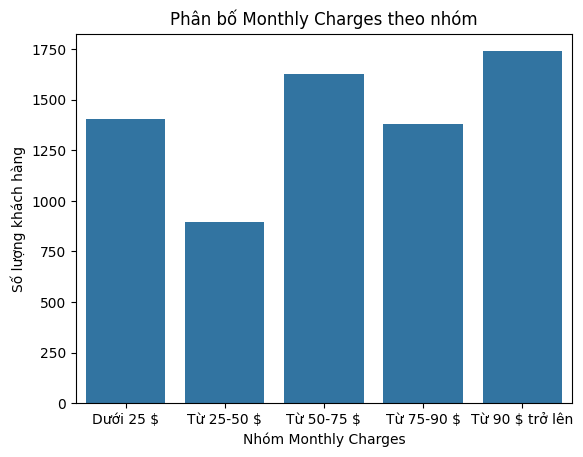

In [ ]:

sns.countplot(
    x='monthcharge_group',
    data=df,
    order=['Dưới 25 $', 'Từ 25-50 $', 'Từ 50-75 $', 'Từ 75-90 $', 'Từ 90 $ trở lên']
)
plt.title('Phân bố Monthly Charges theo nhóm')
plt.xlabel('Nhóm Monthly Charges')
plt.ylabel('Số lượng khách hàng')
plt.show()

Churn Rate by MonthlyCharges Group: monthcharge_group  Churn
Dưới 25 $          No       90.97
                   Yes       9.03
Từ 25-50 $         No       73.80
                   Yes      26.20
Từ 50-75 $         No       73.71
                   Yes      26.29
Từ 75-90 $         No       63.00
                   Yes      37.00
Từ 90 $ trở lên    No       67.22
                   Yes      32.78
Name: proportion, dtype: float64


/tmp/ipython-input-290438136.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_yes.index, y=churn_yes.values, palette='Reds')


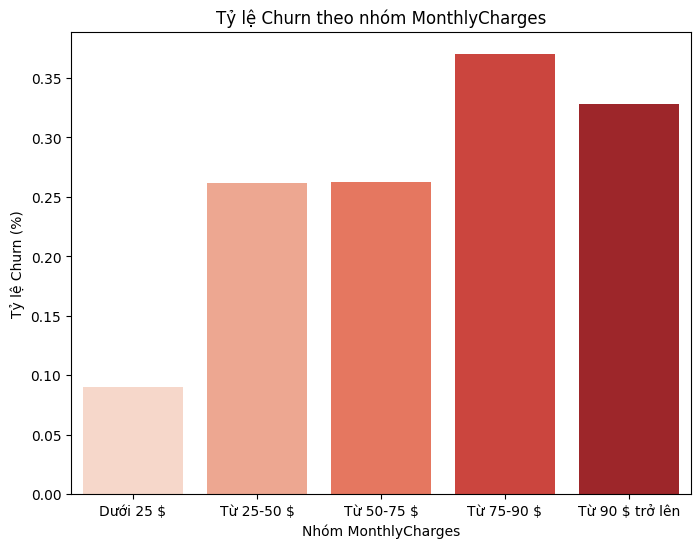

In [ ]:
# Tính tỷ lệ Churn theo nhóm MonthlyCharges
pct_churn_by_monthlycharge = df.groupby('monthcharge_group')['Churn'].value_counts(normalize=True)
print('Churn Rate by MonthlyCharges Group:',(pct_churn_by_monthlycharge*100).round(2))

# Lọc chỉ Churn = 'Yes'
churn_yes = pct_churn_by_monthlycharge[:, 'Yes']  # pandas Series, index là monthcharge_group

# Vẽ biểu đồ
plt.figure(figsize=(8,6))
sns.barplot(x=churn_yes.index, y=churn_yes.values, palette='Reds')
plt.title('Tỷ lệ Churn theo nhóm MonthlyCharges')
plt.xlabel('Nhóm MonthlyCharges')
plt.ylabel('Tỷ lệ Churn (%)')
plt.show()

Khách hàng có mức chi tiêu cao (75 - 90 và trên 90) có tỷ lệ rời bỏ cao nhất (37.00% và 32.78%)

⇒ Chi tiêu hàng tháng cao, càng dễ rời bỏ dịch vụ.
⇒ Mức phí hàng tháng cao là nguyên nhân Khách hàng rời bỏ dịch vụ


**Total Charges:**

In [ ]:
def totalcharge_groups(TotalCharges):
    if TotalCharges <= 2000:
        return 'Dưới 2000'
    elif TotalCharges <= 4000:
        return 'Từ 2000-4000'
    elif TotalCharges <= 6000:
        return 'Từ 4000-6000'
    elif TotalCharges <= 8000:
        return 'Từ 6000-8000'
    else:
        return 'Trên 8000'

df['totalcharge_group'] = df['TotalCharges'].apply(totalcharge_groups)
df['totalcharge_group'].value_counts()


,count
totalcharge_group,
Dưới 2000,4187
Từ 2000-4000,1208
Từ 4000-6000,956
Từ 6000-8000,614
Trên 8000,78


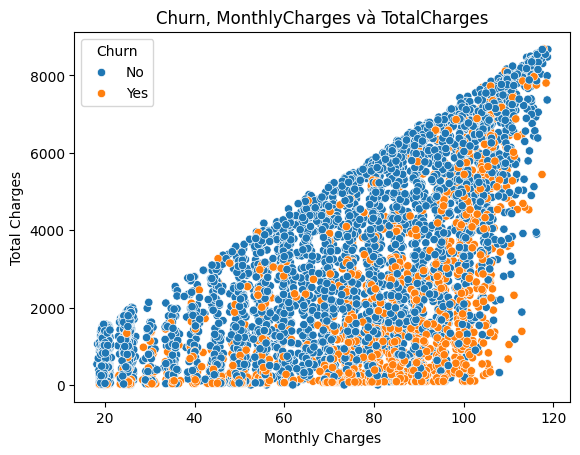

In [ ]:
sns.scatterplot(
    data=df,
    x='MonthlyCharges',
    y='TotalCharges',
    hue='Churn'
)
plt.title('Churn, MonthlyCharges và TotalCharges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()


⇒ Khách hàng ở lại (chấm xanh) có xu hướng tập trung nhiều ở rìa trên cho thấy KH thanh toán đều mỗi tháng để duy trì dịch vụ, làm cho Total Charge cao

⇒ Khách hàng rời bỏ (chấm vàng) có xu hướng chi trả cao trong ngắn hạn (Monthly Charge cao nhưng Total Charge thấp )

#TẠO BẢNG CORRELATION THỂ HIỆN MỐI TƯƠNG QUAN GIỮA CÁC BIẾN VỚI CHURN

In [ ]:
df1 = df.copy()
df1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,monthcharge_group,totalcharge_group
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Dưới 1 năm,Từ 25-50 $,Dưới 2000
1,5575-GNVDE,Male,0,No,No,34,Singleline,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Từ 2-3 năm,Từ 50-75 $,Dưới 2000
2,3668-QPYBK,Male,0,No,No,2,Singleline,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Dưới 1 năm,Từ 50-75 $,Dưới 2000
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Từ 3-4 năm,Từ 25-50 $,Dưới 2000
4,9237-HQITU,Female,0,No,No,2,Singleline,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Dưới 1 năm,Từ 50-75 $,Dưới 2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,MultipleLines,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,Từ 1-2 năm,Từ 75-90 $,Dưới 2000
7039,2234-XADUH,Female,0,Yes,Yes,72,MultipleLines,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,Trên 5 năm,Từ 90 $ trở lên,Từ 6000-8000
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,Dưới 1 năm,Từ 25-50 $,Dưới 2000
7041,8361-LTMKD,Male,1,Yes,No,4,MultipleLines,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,Dưới 1 năm,Từ 50-75 $,Dưới 2000


In [ ]:
df1['PhoneService'].value_counts()

,count
PhoneService,
Singleline,3390
MultipleLines,2971
No,682


In [ ]:
df1['Churn']      = (df['Churn'] == 'Yes').astype(int)
df1['gender']       = (df['gender'] == 'Male').astype(int)
df1['Partner']       = (df['Partner'] == 'Yes').astype(int)
df1['Dependents']      = (df['Dependents'] == 'Yes').astype(int)
df1['PhoneService']       = df['PhoneService'].isin(['Singleline','MultipleLines']).astype(int)
df1['OnlineSecurity']       = (df['OnlineSecurity'] == 'Yes').astype(int) # dich vu Bao mat
df1['OnlineBackup']            = (df['OnlineBackup'] == 'Yes').astype(int) # dich vu luu tru
df1['DeviceProtection']           = (df['DeviceProtection'] == 'Yes').astype(int) # # dich vu bao hiem, tiet kiem phi sua chua ,..
df1['TechSupport']                  = (df['TechSupport'] == 'Yes').astype(int) # dich vu ki thua sua chua
df1['StreamingTV']                     = (df['StreamingTV'] == 'Yes').astype(int) # dich vu xem tv
df1['StreamingMovies']                   = (df['StreamingMovies'] == 'Yes').astype(int) # dich vu xem phim truc tuyen
df1['PaperlessBilling']                     = (df['PaperlessBilling'] == 'Yes').astype(int) # hoa don dien tu
df1
# So sánh từng giá trị trong từng cột có yes = true,no = false
# Sau đó chuyển đổi ép astype sang int va sang dạng định lượng, 1 : male , 0 female  , yes : , no : 0

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,monthcharge_group,totalcharge_group
0,7590-VHVEG,0,0,1,0,1,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,Dưới 1 năm,Từ 25-50 $,Dưới 2000
1,5575-GNVDE,1,0,0,0,34,1,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0,Từ 2-3 năm,Từ 50-75 $,Dưới 2000
2,3668-QPYBK,1,0,0,0,2,1,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,Dưới 1 năm,Từ 50-75 $,Dưới 2000
3,7795-CFOCW,1,0,0,0,45,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Từ 3-4 năm,Từ 25-50 $,Dưới 2000
4,9237-HQITU,0,0,0,0,2,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,Dưới 1 năm,Từ 50-75 $,Dưới 2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0,Từ 1-2 năm,Từ 75-90 $,Dưới 2000
7039,2234-XADUH,0,0,1,1,72,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0,Trên 5 năm,Từ 90 $ trở lên,Từ 6000-8000
7040,4801-JZAZL,0,0,1,1,11,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0,Dưới 1 năm,Từ 25-50 $,Dưới 2000
7041,8361-LTMKD,1,1,1,0,4,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1,Dưới 1 năm,Từ 50-75 $,Dưới 2000


In [ ]:
df1['PhoneService'].value_counts()

,count
PhoneService,
1,6361
0,682


XỬ LÝ CÁC CỘT CÒN LẠI

In [ ]:
df1['Contract'] = df1['Contract'].map({'Month-to-month' : 0, 'One year' : 1, 'Two year' : 2})

In [ ]:
df1['Contract'].value_counts()

,count
Contract,
0,3875
2,1695
1,1473


In [ ]:
df1['InternetService'].value_counts()

,count
InternetService,
Fiber optic,3096
DSL,2421
No,1526


In [ ]:
df1['InternetService'] = (df['InternetService']).map({'Fiber optic' : 1, 'DSL' : 1, 'No' : 0})

In [ ]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,monthcharge_group,totalcharge_group
0,7590-VHVEG,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,Electronic check,29.85,29.85,0,Dưới 1 năm,Từ 25-50 $,Dưới 2000
1,5575-GNVDE,1,0,0,0,34,1,1,1,0,1,0,0,0,1,0,Mailed check,56.95,1889.50,0,Từ 2-3 năm,Từ 50-75 $,Dưới 2000
2,3668-QPYBK,1,0,0,0,2,1,1,1,1,0,0,0,0,0,1,Mailed check,53.85,108.15,1,Dưới 1 năm,Từ 50-75 $,Dưới 2000
3,7795-CFOCW,1,0,0,0,45,0,1,1,0,1,1,0,0,1,0,Bank transfer (automatic),42.30,1840.75,0,Từ 3-4 năm,Từ 25-50 $,Dưới 2000
4,9237-HQITU,0,0,0,0,2,1,1,0,0,0,0,0,0,0,1,Electronic check,70.70,151.65,1,Dưới 1 năm,Từ 50-75 $,Dưới 2000


In [ ]:
df1 = pd.get_dummies(df1, columns=["PaymentMethod"], prefix="PaymentMethod", dtype=int)
df1


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,tenure_group,monthcharge_group,totalcharge_group,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,29.85,29.85,0,Dưới 1 năm,Từ 25-50 $,Dưới 2000,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,1,1,0,1,0,0,0,1,0,56.95,1889.50,0,Từ 2-3 năm,Từ 50-75 $,Dưới 2000,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,1,1,0,0,0,0,0,1,53.85,108.15,1,Dưới 1 năm,Từ 50-75 $,Dưới 2000,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,1,1,0,1,1,0,0,1,0,42.30,1840.75,0,Từ 3-4 năm,Từ 25-50 $,Dưới 2000,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,1,0,0,0,0,0,0,0,1,70.70,151.65,1,Dưới 1 năm,Từ 50-75 $,Dưới 2000,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,1,1,0,1,1,1,1,1,1,84.80,1990.50,0,Từ 1-2 năm,Từ 75-90 $,Dưới 2000,0,0,0,1
7039,2234-XADUH,0,0,1,1,72,1,1,0,1,1,0,1,1,1,1,103.20,7362.90,0,Trên 5 năm,Từ 90 $ trở lên,Từ 6000-8000,0,1,0,0
7040,4801-JZAZL,0,0,1,1,11,0,1,1,0,0,0,0,0,0,1,29.60,346.45,0,Dưới 1 năm,Từ 25-50 $,Dưới 2000,0,0,1,0
7041,8361-LTMKD,1,1,1,0,4,1,1,0,0,0,0,0,0,0,1,74.40,306.60,1,Dưới 1 năm,Từ 50-75 $,Dưới 2000,0,0,0,1


**Tỷ lệ Churn theo Tổng số lượng dịch vụ mỗi khách hàng đăng ký**

TotalService
0    2219
3    1118
2    1033
1     966
4     852
5     571
6     284
Name: count, dtype: int64


<Axes: xlabel='TotalService', ylabel='count'>

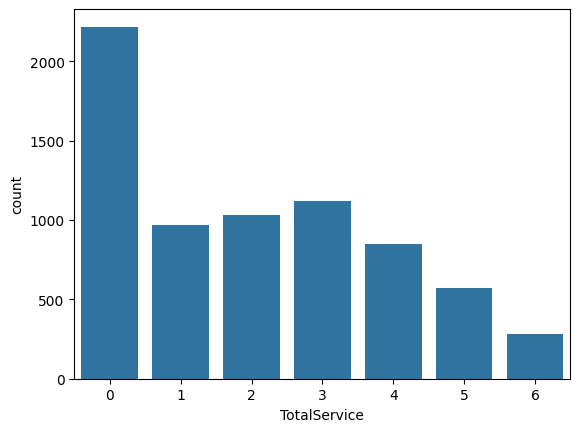

In [ ]:
services = ['OnlineSecurity', 'OnlineBackup', 'StreamingTV', 'StreamingMovies', 'DeviceProtection', 'TechSupport']
df1['TotalService'] = df1[services].sum(axis=1)

print(df1['TotalService'].value_counts())

sns.countplot(x='TotalService', data=df1)

Churn Rate by Total Service:
 TotalService  Churn
0             0        78.593961
              1        21.406039
1             0        54.244306
              1        45.755694
2             0        64.181994
              1        35.818006
3             0        72.629696
              1        27.370304
4             0        77.699531
              1        22.300469
5             0        87.565674
              1        12.434326
6             0        94.718310
              1         5.281690
Name: proportion, dtype: float64


/tmp/ipython-input-846120867.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_yes.index, y=churn_yes.values, palette='Reds')


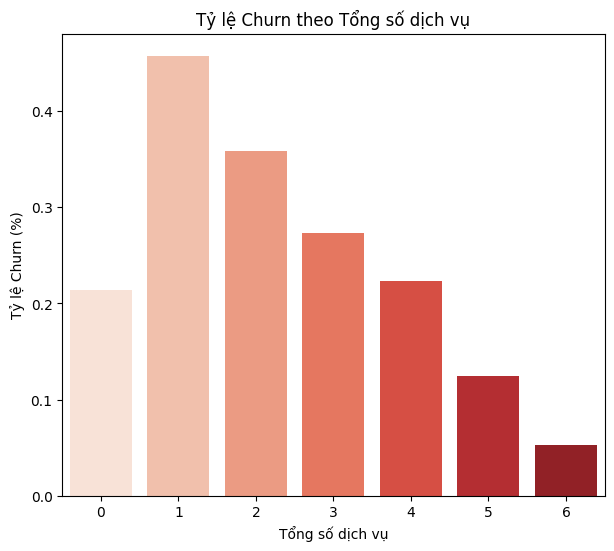

In [ ]:
pct_churn_by_totalservices = df1.groupby('TotalService')['Churn'].value_counts(normalize=True)
print(f'Churn Rate by Total Service:\n {pct_churn_by_totalservices*100}')

# Lọc chỉ lấy Churn = 'Yes'
churn_yes = pct_churn_by_totalservices[:, 1]  # pandas Series, index là TotalService

# Vẽ biểu đồ
plt.figure(figsize=(7,6))
sns.barplot(x=churn_yes.index, y=churn_yes.values, palette='Reds')
plt.title('Tỷ lệ Churn theo Tổng số dịch vụ')
plt.xlabel('Tổng số dịch vụ')
plt.ylabel('Tỷ lệ Churn (%)')
plt.show()


- Lượng khách hàng không đăng ký dịch vụ chiếm đa số

  => Khách dùng 0 dịch vụ có churn không quá cao vì tính “thụ động”.

- Đăng ký càng nhiều dịch vụ, số lượng Khách hàng Churn càng giảm

- Tỷ lệ rời bỏ sẽ giảm dần, nếu KH đăng ký càng nhiều dịch vụ internet


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   gender                                   7043 non-null   int64  
 2   SeniorCitizen                            7043 non-null   int64  
 3   Partner                                  7043 non-null   int64  
 4   Dependents                               7043 non-null   int64  
 5   tenure                                   7043 non-null   int64  
 6   PhoneService                             7043 non-null   int64  
 7   InternetService                          7043 non-null   int64  
 8   OnlineSecurity                           7043 non-null   int64  
 9   OnlineBackup                             7043 non-null   int64  
 10  DeviceProtection                         7043 no

In [ ]:
cols_corr = ['Churn','gender','SeniorCitizen','Partner','Dependents','tenure',
             'PhoneService','InternetService',
             'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
             'StreamingTV','StreamingMovies',
             'Contract','PaperlessBilling',
             'PaymentMethod_Bank transfer (automatic)',
             'PaymentMethod_Credit card (automatic)',
             'PaymentMethod_Electronic check',
             'PaymentMethod_Mailed check',
             'TotalCharges','MonthlyCharges','TotalService']

df1_corr = df1[cols_corr].corr()
df1_corr


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TotalCharges,MonthlyCharges,TotalService
Churn,1.000000,-0.008612,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.227890,-0.171226,-0.082255,-0.066160,-0.164674,0.063228,0.061382,-0.396713,0.191825,-0.117937,-0.134302,0.301919,-0.091683,-0.198324,0.193356,-0.087698
gender,-0.008612,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006026,-0.017021,-0.013773,-0.002105,-0.009212,-0.008393,-0.010487,0.000126,-0.011754,-0.016024,0.001215,0.000752,0.013744,-0.000080,-0.014569,-0.015489
SeniorCitizen,0.150889,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.182742,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,-0.142554,0.156530,-0.016159,-0.024135,0.171718,-0.153477,0.103006,0.220173,0.067493
Partner,-0.150448,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,-0.000615,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,0.294806,-0.014877,0.110706,0.082029,-0.083852,-0.095125,0.317504,0.096848,0.204237
Dependents,-0.164221,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.139812,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,0.243187,-0.111377,0.052021,0.060267,-0.150642,0.059071,0.062078,-0.113890,0.030200
tenure,-0.352229,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.039062,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.671607,0.006152,0.243510,0.233006,-0.208363,-0.233852,0.826178,0.247900,0.494263
PhoneService,0.011942,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.172209,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.002247,0.016505,0.007556,-0.007721,0.003062,-0.003319,0.113214,0.247398,-0.092810
InternetService,0.227890,-0.006026,0.182742,-0.000615,-0.139812,0.039062,-0.172209,1.000000,0.333403,0.381593,0.380754,0.336298,0.415552,0.418675,-0.242388,0.321013,0.002113,-0.001030,0.284917,-0.321361,0.375223,0.763557,0.580115
OnlineSecurity,-0.171226,-0.017021,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.333403,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,0.245530,-0.003636,0.095158,0.115721,-0.112338,-0.080798,0.411651,0.296594,0.571606
OnlineBackup,-0.082255,-0.013773,0.066572,0.141498,0.023671,0.360277,-0.052312,0.381593,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.155085,0.126735,0.087004,0.090785,-0.000408,-0.174164,0.509226,0.441780,0.623741


VẼ HEATMAP

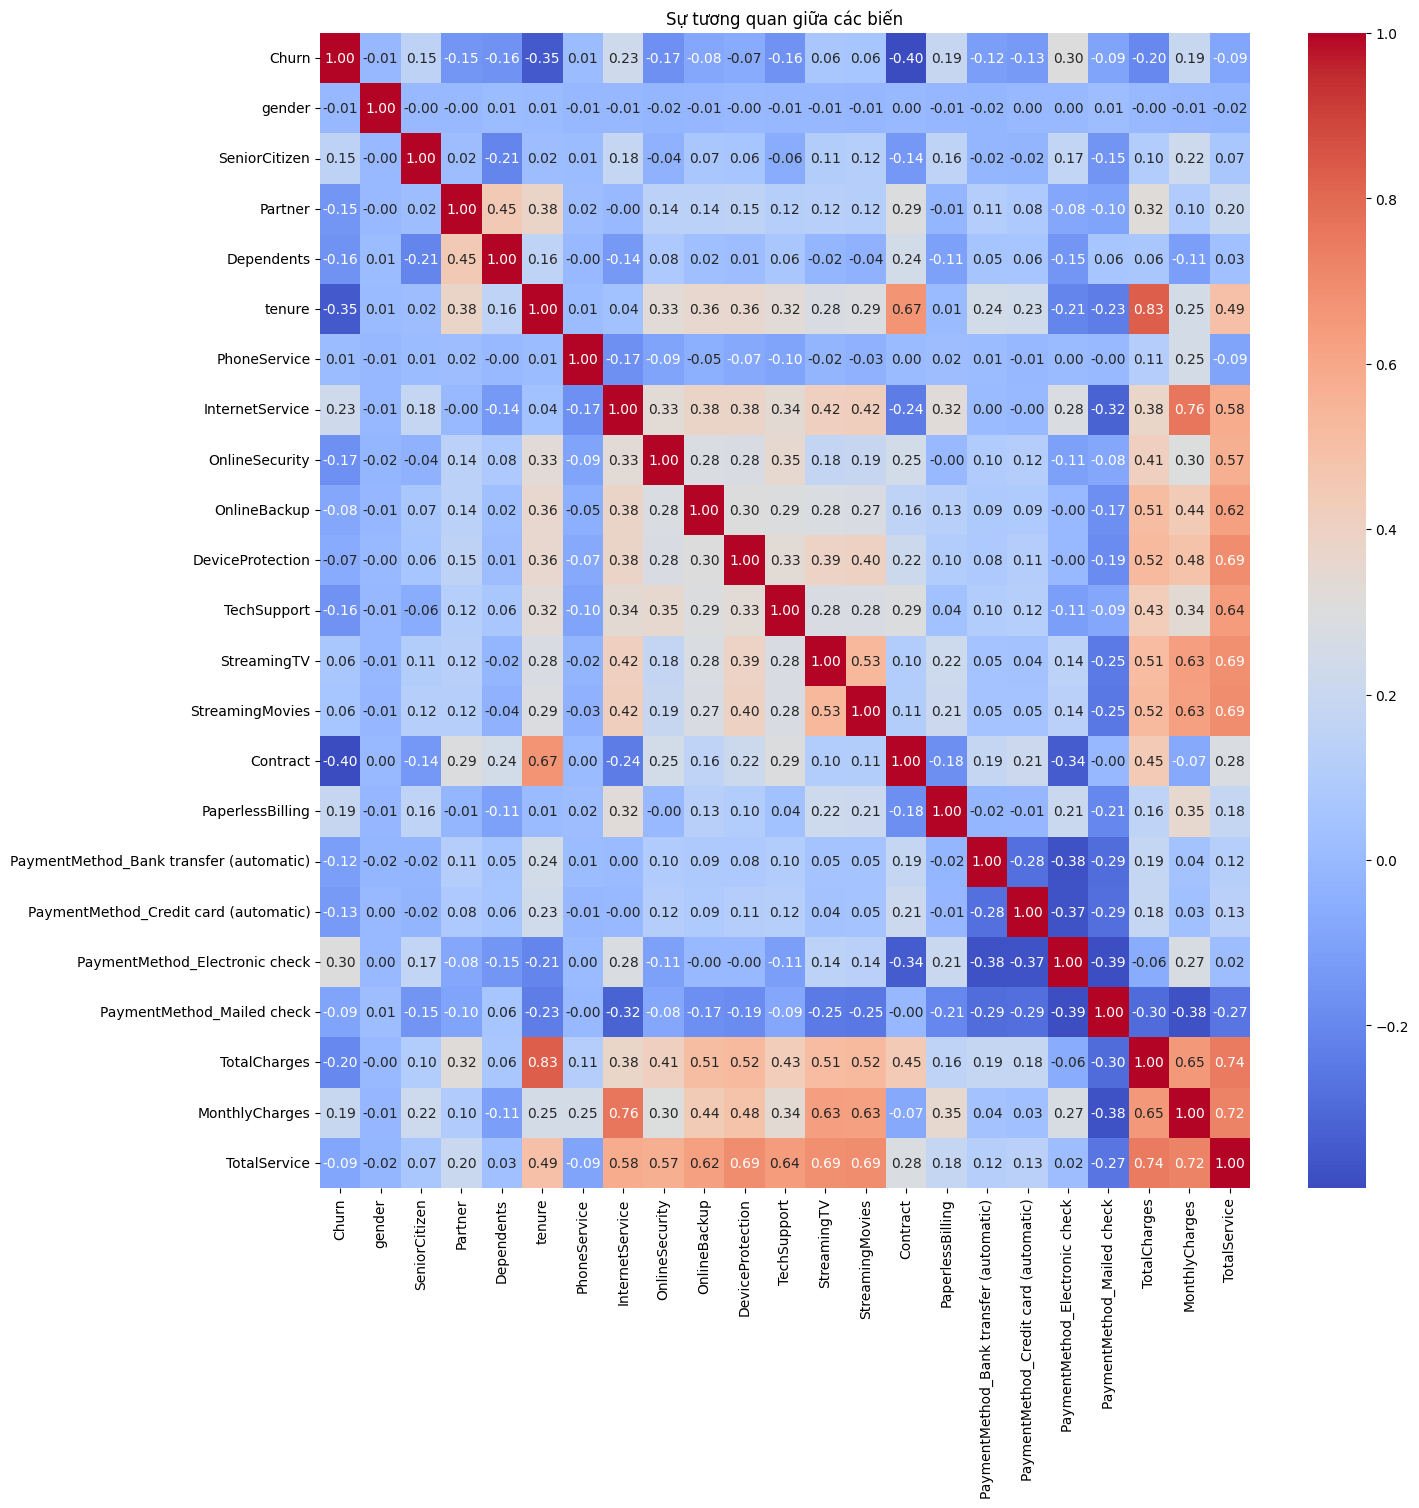

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
sns.heatmap(
    df1_corr,
    annot=True,
    fmt='.2f',
    cmap='coolwarm'
)
plt.title('Sự tương quan giữa các biến')
plt.show()

XỬ LÝ CỘT INDEX

In [ ]:
df1_corr
# Cần reset index thành 1 cột với các biến categorycal, từ đó có được 1 bảng hoàn chỉnh với các cột

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TotalCharges,MonthlyCharges,TotalService
Churn,1.000000,-0.008612,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.227890,-0.171226,-0.082255,-0.066160,-0.164674,0.063228,0.061382,-0.396713,0.191825,-0.117937,-0.134302,0.301919,-0.091683,-0.198324,0.193356,-0.087698
gender,-0.008612,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006026,-0.017021,-0.013773,-0.002105,-0.009212,-0.008393,-0.010487,0.000126,-0.011754,-0.016024,0.001215,0.000752,0.013744,-0.000080,-0.014569,-0.015489
SeniorCitizen,0.150889,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.182742,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,-0.142554,0.156530,-0.016159,-0.024135,0.171718,-0.153477,0.103006,0.220173,0.067493
Partner,-0.150448,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,-0.000615,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,0.294806,-0.014877,0.110706,0.082029,-0.083852,-0.095125,0.317504,0.096848,0.204237
Dependents,-0.164221,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.139812,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,0.243187,-0.111377,0.052021,0.060267,-0.150642,0.059071,0.062078,-0.113890,0.030200
tenure,-0.352229,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.039062,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.671607,0.006152,0.243510,0.233006,-0.208363,-0.233852,0.826178,0.247900,0.494263
PhoneService,0.011942,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.172209,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.002247,0.016505,0.007556,-0.007721,0.003062,-0.003319,0.113214,0.247398,-0.092810
InternetService,0.227890,-0.006026,0.182742,-0.000615,-0.139812,0.039062,-0.172209,1.000000,0.333403,0.381593,0.380754,0.336298,0.415552,0.418675,-0.242388,0.321013,0.002113,-0.001030,0.284917,-0.321361,0.375223,0.763557,0.580115
OnlineSecurity,-0.171226,-0.017021,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.333403,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,0.245530,-0.003636,0.095158,0.115721,-0.112338,-0.080798,0.411651,0.296594,0.571606
OnlineBackup,-0.082255,-0.013773,0.066572,0.141498,0.023671,0.360277,-0.052312,0.381593,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.155085,0.126735,0.087004,0.090785,-0.000408,-0.174164,0.509226,0.441780,0.623741


In [ ]:
df1_corr = df1_corr.reset_index()
df1_corr

,index,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TotalCharges,MonthlyCharges,TotalService
0,Churn,1.000000,-0.008612,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.227890,-0.171226,-0.082255,-0.066160,-0.164674,0.063228,0.061382,-0.396713,0.191825,-0.117937,-0.134302,0.301919,-0.091683,-0.198324,0.193356,-0.087698
1,gender,-0.008612,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006026,-0.017021,-0.013773,-0.002105,-0.009212,-0.008393,-0.010487,0.000126,-0.011754,-0.016024,0.001215,0.000752,0.013744,-0.000080,-0.014569,-0.015489
2,SeniorCitizen,0.150889,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.182742,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,-0.142554,0.156530,-0.016159,-0.024135,0.171718,-0.153477,0.103006,0.220173,0.067493
3,Partner,-0.150448,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,-0.000615,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,0.294806,-0.014877,0.110706,0.082029,-0.083852,-0.095125,0.317504,0.096848,0.204237
4,Dependents,-0.164221,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.139812,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,0.243187,-0.111377,0.052021,0.060267,-0.150642,0.059071,0.062078,-0.113890,0.030200
5,tenure,-0.352229,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.039062,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.671607,0.006152,0.243510,0.233006,-0.208363,-0.233852,0.826178,0.247900,0.494263
6,PhoneService,0.011942,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.172209,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.002247,0.016505,0.007556,-0.007721,0.003062,-0.003319,0.113214,0.247398,-0.092810
7,InternetService,0.227890,-0.006026,0.182742,-0.000615,-0.139812,0.039062,-0.172209,1.000000,0.333403,0.381593,0.380754,0.336298,0.415552,0.418675,-0.242388,0.321013,0.002113,-0.001030,0.284917,-0.321361,0.375223,0.763557,0.580115
8,OnlineSecurity,-0.171226,-0.017021,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.333403,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,0.245530,-0.003636,0.095158,0.115721,-0.112338,-0.080798,0.411651,0.296594,0.571606
9,OnlineBackup,-0.082255,-0.013773,0.066572,0.141498,0.023671,0.360277,-0.052312,0.381593,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.155085,0.126735,0.087004,0.090785,-0.000408,-0.174164,0.509226,0.441780,0.623741


TÁCH CHURN VÀ INDEX NHẰM PHỤC VỤ PHÂN TÍCH

In [ ]:
df_correlation = df1_corr[['index','Churn']]
df_correlation

,index,Churn
0,Churn,1.000000
1,gender,-0.008612
2,SeniorCitizen,0.150889
3,Partner,-0.150448
4,Dependents,-0.164221
5,tenure,-0.352229
6,PhoneService,0.011942
7,InternetService,0.227890
8,OnlineSecurity,-0.171226
9,OnlineBackup,-0.082255


In [ ]:
# df_correlation = corr_correlation[corr_correlation['index'] != 'Churn']
# df_correlation

DỮ LIỆU CORRELATION CHUẨN ĐỂ PHÂN TÍCH

In [ ]:
df_correlation.columns = ['Variable', 'Correlation'] #Rename các cột trong df_correlation
# Loại bỏ dòng 'Churn'
df_correlation = df_correlation[df_correlation['Variable'] != 'Churn']
df_correlation


,Variable,Correlation
1,gender,-0.008612
2,SeniorCitizen,0.150889
3,Partner,-0.150448
4,Dependents,-0.164221
5,tenure,-0.352229
6,PhoneService,0.011942
7,InternetService,0.227890
8,OnlineSecurity,-0.171226
9,OnlineBackup,-0.082255
10,DeviceProtection,-0.066160


XUẤT FILE ĐỂ INPUT VÀO POWER BI

In [ ]:
df_correlation.to_csv('df_correlation.csv', index=False) # Index=False nhằm khi xuất file dữ liệu không còn cột stt từ 0-... nữa, mà chỉ lấy 2 cột chính.

/tmp/ipython-input-3050504729.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Correlation', y='Variable', data=df_correlation,palette='Reds_r')


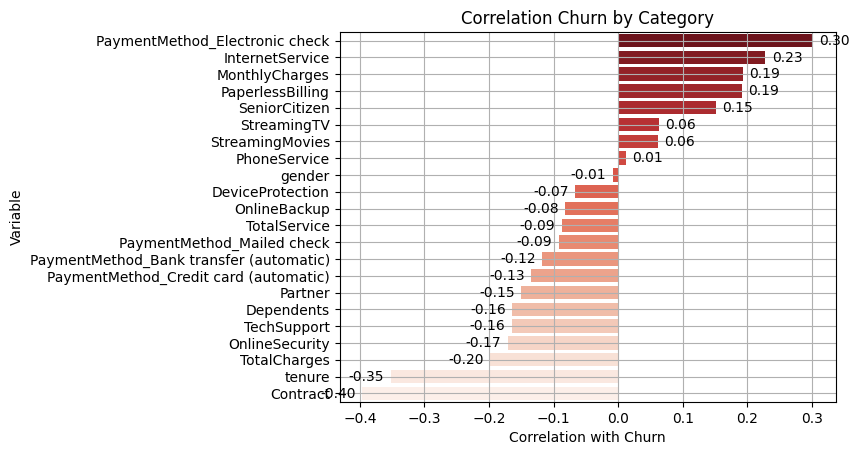

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# Sắp xếp theo Correlation
df_correlation = df_correlation.sort_values('Correlation', ascending=False)

ax = sns.barplot(x='Correlation', y='Variable', data=df_correlation,palette='Reds_r')

# Hiển thị giá trị lên từng thanh
for p in ax.patches:
    width = p.get_width()  # giá trị bar
    ax.text(
        width + (0.01 if width > 0 else -0.01),  # offset để text không chạm thanh
        p.get_y() + p.get_height()/2,
        f"{width:.2f}",
        ha='left' if width > 0 else 'right',
        va='center'
    )
plt.grid(True)
plt.title('Correlation Churn by Category')
plt.xlabel('Correlation with Churn')
plt.ylabel('Variable')
plt.show()



**Đặc điểm khách hàng dễ churn (▲ churn):**

Senior Citizen (khách cao tuổi dễ rời dịch vụ).

Tenure thấp (khách mới, thời gian gắn bó ngắn dễ churn).

Thanh toán bằng Electronic Check và Paperless Billing → khách dễ rời.

Không sử dụng dịch vụ bổ sung như Online Security hay Tech Support.

**Đặc điểm khách hàng ít churn / giữ chân tốt (▼ churn):**

Contract dài hạn → khách trung thành.

Sử dụng Internet Service: Fiber Optic và dịch vụ bổ sung: Device Protection, Online Backup, Streaming Movies/TV.

Thanh toán bằng Bank Transfer / Mailed / Credit Card → giữ khách tốt.

**Biến ít hoặc không ảnh hưởng rõ đến churn:**

Gender, Dependents, Partner → chỉ tác động nhẹ.

Các biến về chi phí: Monthly Charges, Total Charges → ít tác động trực tiếp.

Một số dịch vụ cơ bản: Phone Service (tác động vừa phải, không quá lớn).

**Tương quan tổng quan:**

▲ Churn (dễ rời): khách mới, cao tuổi, thanh toán điện tử, không có hợp đồng dài, ít dùng dịch vụ bổ sung.

▼ Churn (giữ chân tốt): khách hợp đồng dài, dùng Fiber Optic + dịch vụ phụ trợ, thanh toán truyền thống.

#NGUYÊN NHÂN GIẢI PHÁP

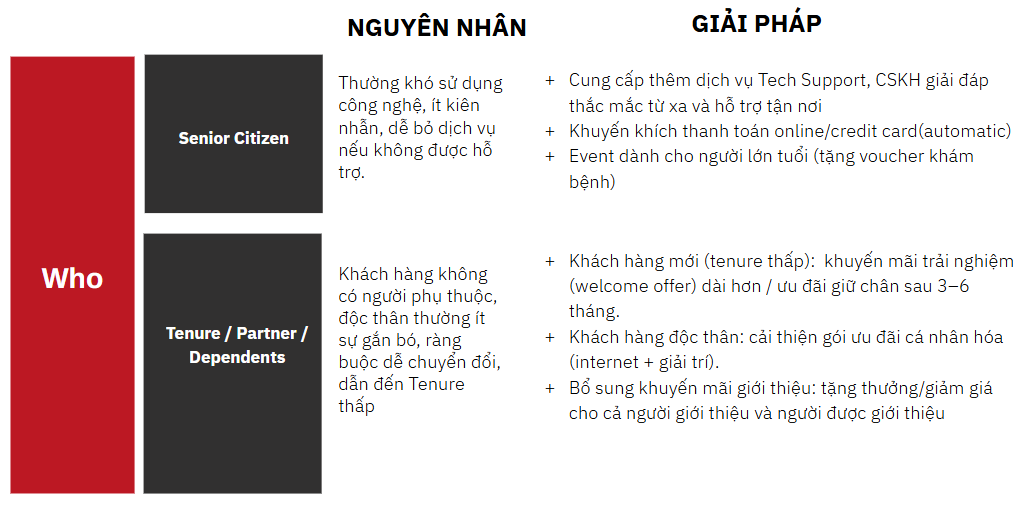

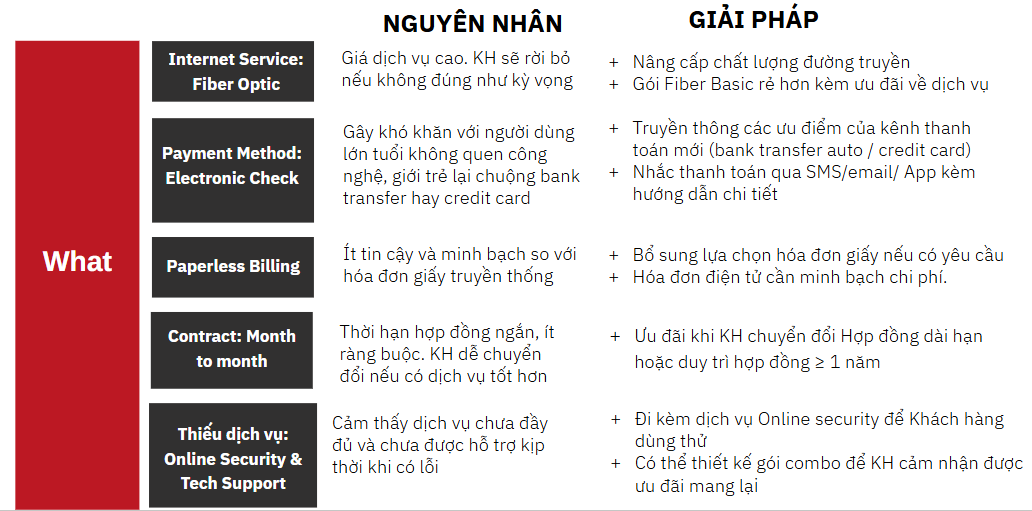

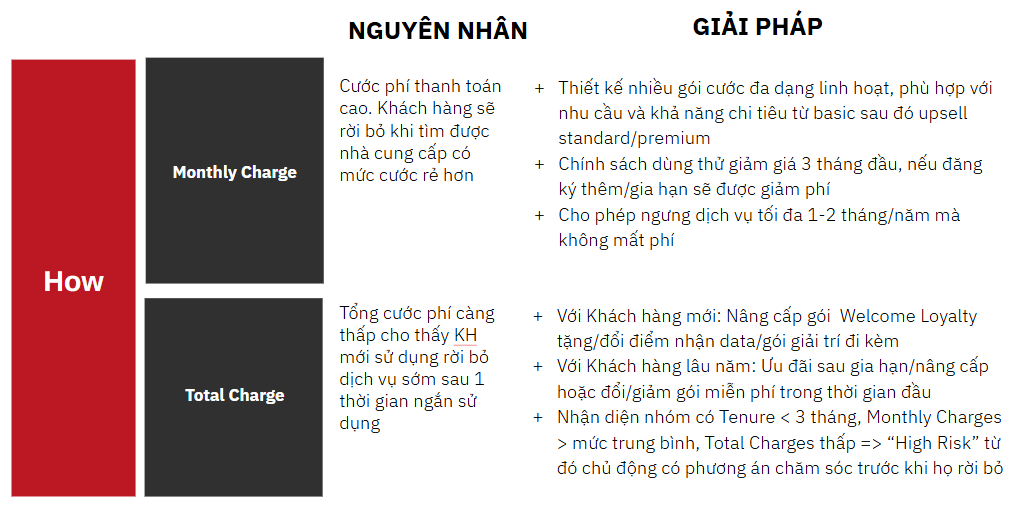

#SỬ DỤNG MÔ HÌNH MACHINE LEARNING

**Dữ liệu với Biến phụ thuộc Churn có kiểu Binary Yes/No(1/0)
- Mô hình sử dụng là mô hình phân loại
- Tiến hành xử lý các kiểu dữ liệu
- Xử lý dữ liệu mất cân bằng
- Sử dụng Pipeline để tiến hành xử lý
- Áp dụng mô hình học máy cho ra kết quả tốt nhất

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,monthcharge_group,totalcharge_group
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Dưới 1 năm,Từ 25-50 $,Dưới 2000
1,5575-GNVDE,Male,0,No,No,34,Singleline,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Từ 2-3 năm,Từ 50-75 $,Dưới 2000
2,3668-QPYBK,Male,0,No,No,2,Singleline,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Dưới 1 năm,Từ 50-75 $,Dưới 2000
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Từ 3-4 năm,Từ 25-50 $,Dưới 2000
4,9237-HQITU,Female,0,No,No,2,Singleline,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Dưới 1 năm,Từ 50-75 $,Dưới 2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,MultipleLines,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,Từ 1-2 năm,Từ 75-90 $,Dưới 2000
7039,2234-XADUH,Female,0,Yes,Yes,72,MultipleLines,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,Trên 5 năm,Từ 90 $ trở lên,Từ 6000-8000
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,Dưới 1 năm,Từ 25-50 $,Dưới 2000
7041,8361-LTMKD,Male,1,Yes,No,4,MultipleLines,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,Dưới 1 năm,Từ 50-75 $,Dưới 2000


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC,SVR
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
#Chia train test
y= df['Churn'].map({'Yes' : 1, 'No' : 0})
x= df.drop(columns=['customerID','Churn'])

x_train,x_test,y_train,y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=11,
    shuffle=True,
    stratify=y
)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)
print(y.value_counts(),y_train.value_counts(),y_test.value_counts())

(5634, 21) (1409, 21)
(5634,) (1409,)
Churn
0    5174
1    1869
Name: count, dtype: int64 Churn
0    4139
1    1495
Name: count, dtype: int64 Churn
0    1035
1     374
Name: count, dtype: int64


1. Tỉ lệ lớp bị imbalance  → cần xử lý khi train model:

- SMOTE (tăng mẫu lớp Churn=Yes)

- Class weight (LogisticRegression, RandomForest…)

2. Kích thước train/test hợp lý:

- Train 5634 dòng → đủ lớn để học model ổn định

- Test 1409 dòng → đủ lớn để đánh giá chính xác

3. Sẵn sàng cho bước tiếp theo:

- Build pipeline preprocessing (encode categorical, scale numeric)

- Oversample train với SMOTE

- Train model: Logistic Regression, Random Forest, Decision Tree…

- Đánh giá bằng accuracy, classification_report, AUC

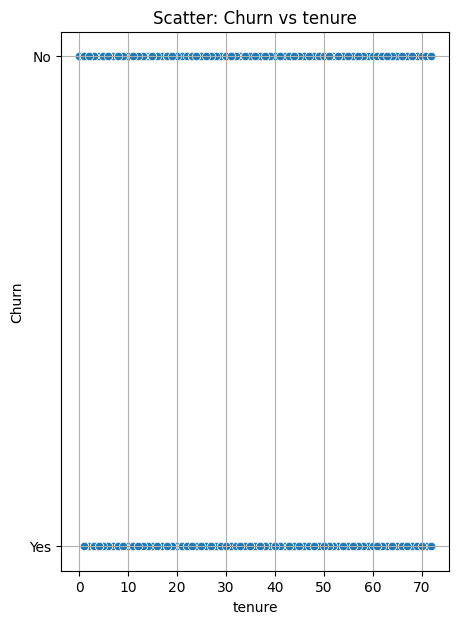

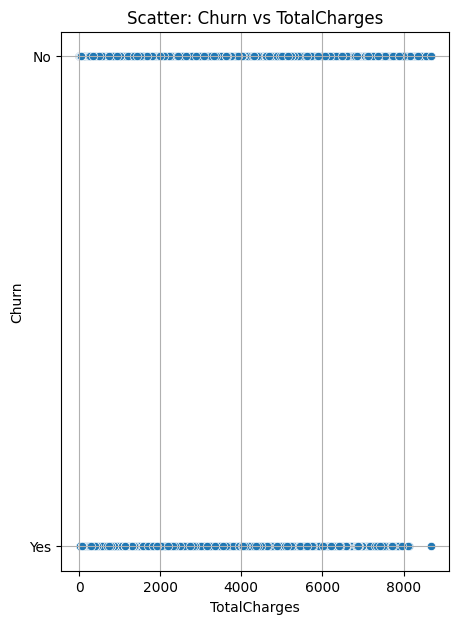

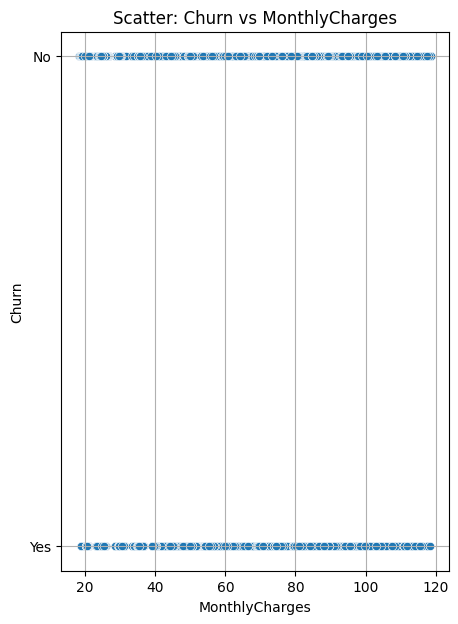

In [ ]:
cols_numeric = ['tenure','TotalCharges','MonthlyCharges']

for col in cols_numeric:
    plt.figure(figsize=(5,7))
    sns.scatterplot(x=df[col], y=df['Churn'])
    plt.xlabel(col)
    plt.ylabel('Churn')
    plt.title(f'Scatter: Churn vs {col}')
    plt.grid(True)
    plt.show()


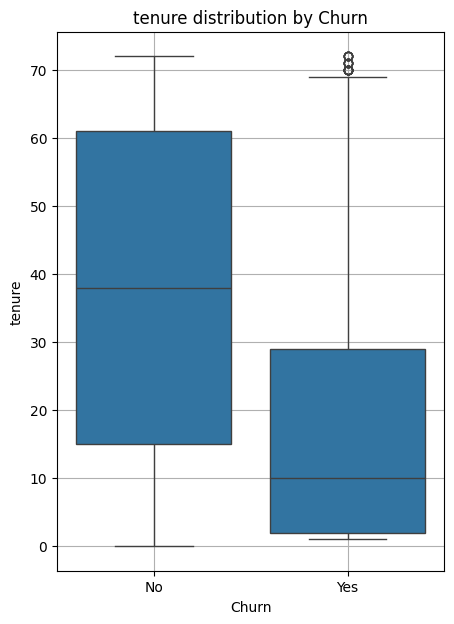

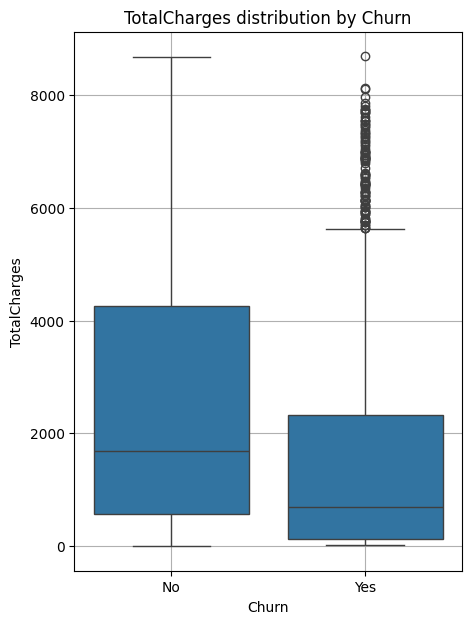

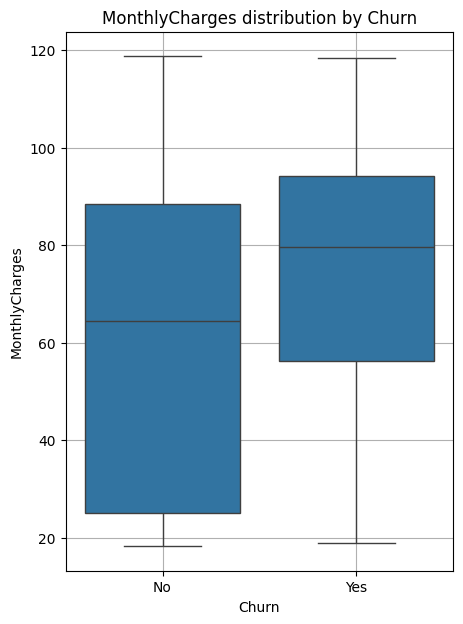

In [ ]:
cols_numeric = ['tenure','TotalCharges','MonthlyCharges']

for col in cols_numeric:
    plt.figure(figsize=(5,7))
    sns.boxplot(x=df['Churn'], y=df[col])
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.title(f'{col} distribution by Churn')
    plt.grid(True)
    plt.show()


Model Base

In [ ]:
#Xác định các cột phân loại và cột số:
# Columns
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
ord_cols = ['gender','SeniorCitizen','Partner','Dependents',
            'OnlineSecurity','OnlineBackup','DeviceProtection',
            'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']
nor_cols = ['PhoneService','InternetService','Contract','PaymentMethod']

#Preprocessing Numeric columns
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

num_features = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

#Preprocessing Ordinal columns
ord_cols = ['gender','SeniorCitizen', 'Partner', 'Dependents',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']
ord_features = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OrdinalEncoder())
])
#Preprocessing Normial columns
nor_cols = ['PhoneService', 'InternetService', 'Contract','PaymentMethod']
nor_features = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder())
])

#Transform columns
transfomer = ColumnTransformer(transformers=[
    ('num_transformer',num_features,num_cols),
    ('ord_transformer',ord_features,ord_cols),
    ('nor_transformer',nor_features,nor_cols)
])

# Build Model Preprocessing by PipeLine
model = Pipeline(steps=[
    ('transforming',transfomer),
    ('balancing',SMOTE(random_state=11,k_neighbors=5)),
    ('modeling',LogisticRegression())
])

#Train Model
model.fit(x_train,y_train)

#Check Result

y_pred = model.predict(x_test)
#Print Result
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[767 268]
 [ 75 299]]
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1035
           1       0.53      0.80      0.64       374

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.77      1409



Giải thích:

- Class 0 (No churn)

Precision cao (0.91) → dự đoán là “No churn” thì đúng 91%

Recall thấp hơn (0.74) → thực tế No churn, model chỉ đúng 74% → có 26% bị nhầm là Churn

> Ý nghĩa: Dự đoán “khách không rời” rất chính xác (91%) nhưng vẫn có 26% nhầm thành là khách Rời đi

- Class 1 (Churn)

Recall cao (0.80) → thực tế Churn, model dự đoán đúng 80% → tốt

Precision thấp (0.53) → trong số dự đoán là Churn, chỉ đúng 53% → còn nhiều false positive

>Ý nghĩa: Dự đoán “khách sẽ rời” đúng 53%, nhưng phát hiện được 80% khách thực sự rời

- F1-score kết hợp precision + recall:

Churn = 1: 0.64 → trung bình, còn cải thiện được

**Nhận xét tổng thể**

Model tốt trong việc phát hiện khách có nguy cơ rời dịch vụ (recall 0.80) →  phù hợp nếu mục tiêu là phát hiện khách hàng có nguy cơ rời dịch vụ, có thể gửi ưu đãi, chăm sóc đặc biệt để giữ chân

Tuy nhiên precision thấp (0.53) → nhiều khách được gắn nhãn “sẽ rời” nhưng thực tế không rời → nếu gửi offer/ưu đãi cho những người không thực sự churn, sẽ tốn chi phí, và có thể tốn chi phí marketing nếu áp dụng đại trà





#Thử với các Mô hình khác

In [ ]:
!pip install lazypredict

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.2/764.2 kB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.1 MB/s eta 0:00:00


In [ ]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(x_train, x_test, y_train, y_test)

models

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000761 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 697
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 59
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265353 -> initscore=-1.018328
[LightGBM] [Info] Start training from score -1.018328


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BernoulliNB,0.74,0.76,0.76,0.75,0.13
NearestCentroid,0.74,0.75,0.75,0.75,0.26
GaussianNB,0.71,0.75,0.75,0.73,0.09
Perceptron,0.77,0.75,0.75,0.78,0.24
LinearDiscriminantAnalysis,0.80,0.71,0.71,0.79,0.64
SGDClassifier,0.76,0.71,0.71,0.76,0.72
LogisticRegression,0.80,0.71,0.71,0.79,0.68
QuadraticDiscriminantAnalysis,0.76,0.71,0.71,0.77,0.34
LinearSVC,0.80,0.70,0.70,0.79,0.35


In [ ]:
# Build Model Preprocessing by PipeLine
model = Pipeline(steps=[
    ('transforming',transfomer),
    ('balancing',SMOTE(random_state=11,k_neighbors=5)),
    ('modeling',LogisticRegression(random_state=11))
])

#Train Model
model.fit(x_train,y_train)

#Check Result

y_pred = model.predict(x_test)
#Print Result
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[767 268]
 [ 75 299]]
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1035
           1       0.53      0.80      0.64       374

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.77      1409



Mô hình bắt khách rời tốt nhất (churn recall cao)

Logistic Regression (0.80) – Cao nhất

AdaBoost (0.74)

SVM (0.71)

→ Dùng để phát hiện khách có nguy cơ rời.


# Sử dụng Tuning (hyperparameter tuning) = GridSearchCV để tìm siêu tham số tối ưu của mô hình

**GridSearchCV**

In [ ]:
pipeline = Pipeline([
    ('transforming', transfomer),
    ('balancing', SMOTE(random_state=11)),
    ('modeling', LogisticRegression(max_iter=1000))
])

param_grid = {
    'modeling__C': [0.01, 0.1, 1, 10],
    'modeling__penalty': ['l1', 'l2'],
    'modeling__solver': ['liblinear']
}

grid = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    scoring='recall',
    cv=3,
    n_jobs=-1
)
grid.fit(x_train, y_train)

print("Best Params:", grid.best_params_)
print("Best CV Recall:", grid.best_score_)

y_pred = grid.best_estimator_.predict(x_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Params: {'modeling__C': 1, 'modeling__penalty': 'l1', 'modeling__solver': 'liblinear'}
Best CV Recall: 0.7866080219340957
Confusion Matrix:
 [[765 270]
 [ 76 298]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.74      0.82      1035
           1       0.52      0.80      0.63       374

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.75      0.77      1409



**Mục tiêu là giảm tỷ lệ Churn => ưu tiên Recall => Model tốt nhất

→ Vẽ Confusion Matrix.**

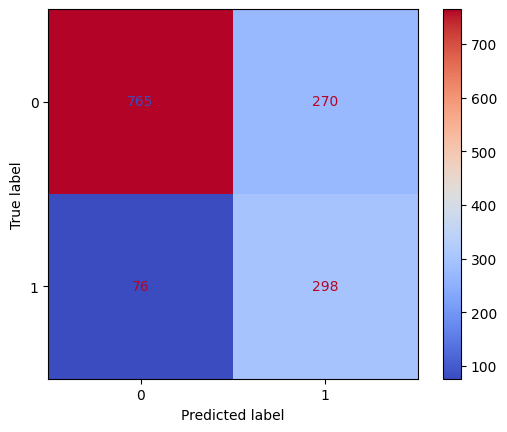

In [ ]:
best_cm = np.array([[765, 270],
                    [76, 298]])

disp = ConfusionMatrixDisplay(confusion_matrix=best_cm)
disp.plot(cmap='coolwarm')
plt.show()


AUC SCORES =  0.85


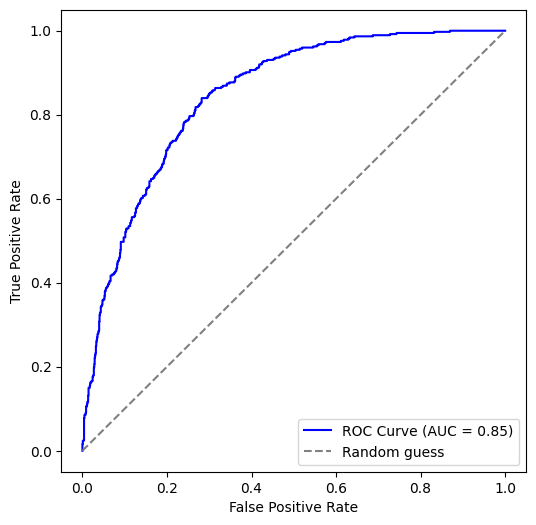

In [ ]:
#Tính xác suất
y_probability = grid.best_estimator_.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test, y_probability)

#Tinh AUC
auc_scores = roc_auc_score(y_test, y_probability)

print('AUC SCORES = ', round((auc_scores),2))

plt.figure(figsize=(6,6))
plt.plot(fpr,tpr,color='blue', label=f'ROC Curve (AUC = {auc_scores:.2f})')
plt.plot([0,1],[0,1],color='grey',linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

AUC SCORES =  0.85 → Mô hình phân biệt churn và không churn rất tốt.

#**Tối ưu THRESHOLD**

- AUC chỉ cho biết model phân tách tốt cỡ nào

- Nhưng doanh nghiệp KHÔNG ra quyết định bằng AUC — mà dùng Threshold.

Mặc định threshold = 0.5 → không tối ưu với dữ liệu mất cân bằng.

==> Cần thử các threshold khác nhau để tăng Recall Churn (class 1).

In [ ]:
thresholds_list = [0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
results = []

for th in thresholds_list:
    y_pred_adj = (y_probability >= th).astype(int)
    report = classification_report(y_test, y_pred_adj, output_dict=True)
    results.append({
        'threshold': th,
        'recall': report['1']['recall'],
        'precision': report['1']['precision'],
        'f1': report['1']['f1-score']
    })

df_results = pd.DataFrame(results)
print(df_results)

   threshold  recall  precision   f1
0       0.20    0.95       0.41 0.57
1       0.25    0.93       0.43 0.58
2       0.30    0.91       0.44 0.60
3       0.35    0.90       0.46 0.61
4       0.40    0.87       0.48 0.62
5       0.45    0.84       0.51 0.63
6       0.50    0.80       0.52 0.63


Ưu tiên Recall (bắt tất cả churn): threshold 0.30–0.35 → recall ~0.90+, F1 ~0.60–0.61, chấp nhận precision thấp.

Cân bằng Recall & Precision (F1 cao nhất): threshold 0.45–0.50 → F1 ~0.63, recall ~0.80–0.84, precision ~0.51–0.52 → đây là ngưỡng tốt nhất để triển khai thực tế.

In [ ]:
#Gán prediction mới bằng threshold = 0.35
TH = 0.45
y_pred_final = (y_probability >= TH).astype(int)

In [ ]:
#Xem lại confusion matrix + classification report
print(confusion_matrix(y_test, y_pred_final))
print(classification_report(y_test, y_pred_final))

[[729 306]
 [ 60 314]]
              precision    recall  f1-score   support

           0       0.92      0.70      0.80      1035
           1       0.51      0.84      0.63       374

    accuracy                           0.74      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.74      0.75      1409



**Tạo danh sách khách hàng nguy cơ cao**

In [ ]:
#Tạo một DataFrame mới chứa toàn bộ các biến đầu vào của khách hàng trong tập test.
df_out = x_test.copy()

# Thêm lại customerID từ DataFrame gốc dựa trên index
df_out.insert(0, 'customerID', df.loc[x_test.index, 'customerID'])

#Thêm cột thể hiện label thật của khách hàng: 0 = Không churn, 1 = Churn
df_out['actual'] = y_test.values

# Thêm cột xác suất churn → Đây là xác suất mà model dự đoán khách hàng có khả năng rời bỏ.
df_out['probability'] = y_probability
# Làm tròn xác suất 2 chữ số thập phân để dễ nhìn
df_out['probability'] = df_out['probability'].round(2)

#Thêm cột dự đoán cuối cùng sau threshold → Đây là dự đoán “churn hoặc không” dựa trên threshold đã chọn (0.35).
#.Nếu probability ≥ 0.35 → 1 (Churn) Nếu < 0.35 → 0
df_out['predicted'] = y_pred_final

# Sắp xếp theo xác suất từ cao đến thấp → Xếp khách hàng nguy cơ cao nhất lên đầu.
df_top = df_out.sort_values(by='probability', ascending=False)

#Xem danh sách Khách hàng cố nguy cơ rời bỏ cao
df_top['predicted'].value_counts()


,count
predicted,
0,789
1,620


In [ ]:
# Lọc tất cả dòng có probability >= 0.45
df_top[df_top['probability'] >= 0.45]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_group,monthcharge_group,totalcharge_group,actual,probability,predicted
2797,6023-YEBUP,Male,0,No,No,3,MultipleLines,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.95,329.95,Dưới 1 năm,Từ 90 $ trở lên,Dưới 2000,1,0.93,1
1026,4822-RVYBB,Male,1,No,No,8,MultipleLines,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.60,819.40,Dưới 1 năm,Từ 90 $ trở lên,Dưới 2000,1,0.93,1
5989,5567-WSELE,Male,1,Yes,No,3,MultipleLines,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.60,279.55,Dưới 1 năm,Từ 90 $ trở lên,Dưới 2000,1,0.93,1
6866,0295-PPHDO,Male,0,No,No,1,MultipleLines,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,95.45,Dưới 1 năm,Từ 90 $ trở lên,Dưới 2000,1,0.93,1
6862,1273-MTETI,Female,1,No,No,4,MultipleLines,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,88.85,372.45,Dưới 1 năm,Từ 75-90 $,Dưới 2000,1,0.92,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5313,1935-IMVBB,Male,0,Yes,No,56,Singleline,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.70,4952.95,Từ 4-5 năm,Từ 75-90 $,Từ 4000-6000,0,0.45,1
2576,1074-AMIOH,Female,0,Yes,Yes,53,Singleline,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),108.25,5935.10,Từ 4-5 năm,Từ 90 $ trở lên,Từ 4000-6000,0,0.45,1
4680,1986-PHGZF,Male,1,No,No,18,MultipleLines,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),58.40,964.90,Từ 1-2 năm,Từ 50-75 $,Dưới 2000,0,0.45,1
1985,8901-HJXTF,Female,0,Yes,Yes,12,No,DSL,No,Yes,No,No,No,No,Month-to-month,No,Mailed check,29.20,309.10,Dưới 1 năm,Từ 25-50 $,Dưới 2000,1,0.45,0


actual: nhãn thật của khách hàng (1 = churn, 0 = không churn).

probability: xác suất dự đoán model trả về cho class 1 (khách hàng churn).

predicted: kết quả dự đoán sau khi so sánh với threshold. Nếu probability >= threshold → 1, còn < threshold → 0.

#Xuất File Excel cho team CRM/Retention

In [ ]:
df_top.to_excel("churn_customers_threshold_035.xlsx", index=False)
